In [61]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Φάκελος με τις εικόνες
input_dir = './archive' 

# Οι κατηγορίες 
my_categories = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Αποθήκευση εικόνων και ετικετών
images = []
labels = []

# Φόρτωση εικόνων μόνο από τις κατηγορίες σου
for category in my_categories:
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):
        print(f"Φορτώνεται κατηγορία: {category}")
        for filename in os.listdir(category_path):
            if filename.endswith('.jpeg') or filename.endswith('.png'):
                image_path = os.path.join(category_path, filename)
                try:
                    img = Image.open(image_path).convert('L')  # μετατροπή σε grayscale (προληπτικά)
                    img = img.resize((64, 64))  # σε περίπτωση που υπάρχουν διαφορετικά μεγέθη
                    images.append(np.array(img))
                    labels.append(category)
                except Exception as e:
                    print(f"Πρόβλημα με την εικόνα {image_path}: {e}")

# Μετατροπή σε NumPy πίνακες
X = np.array(images)
y = np.array(labels)

# Έλεγχος
print(f"Σύνολο εικόνων: {len(X)}")
print(f"Σχήμα πίνακα εικόνων: {X.shape}")
print(f"Κατηγορίες που φορτώθηκαν: {np.unique(y)}")

Φορτώνεται κατηγορία: BreastMRI
Φορτώνεται κατηγορία: ChestCT
Φορτώνεται κατηγορία: CXR
Φορτώνεται κατηγορία: Hand
Σύνολο εικόνων: 38953
Σχήμα πίνακα εικόνων: (38953, 64, 64)
Κατηγορίες που φορτώθηκαν: ['BreastMRI' 'CXR' 'ChestCT' 'Hand']


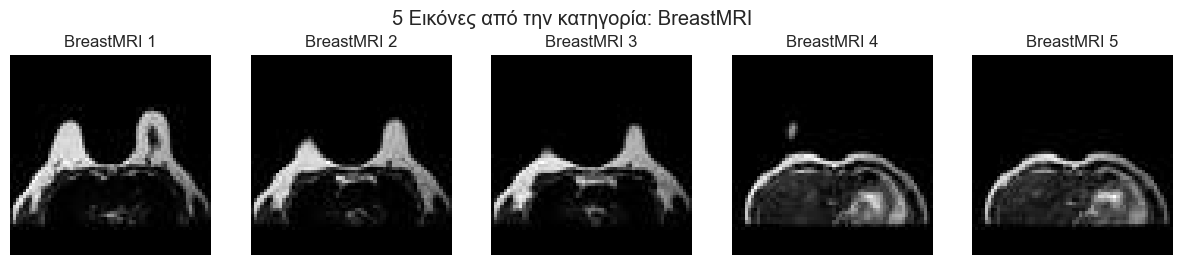

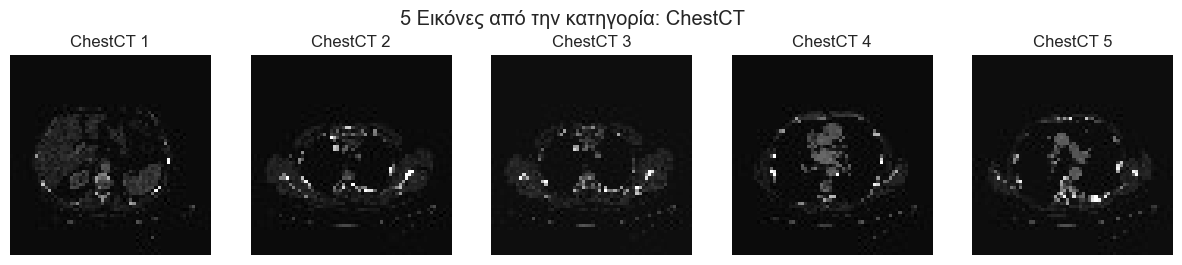

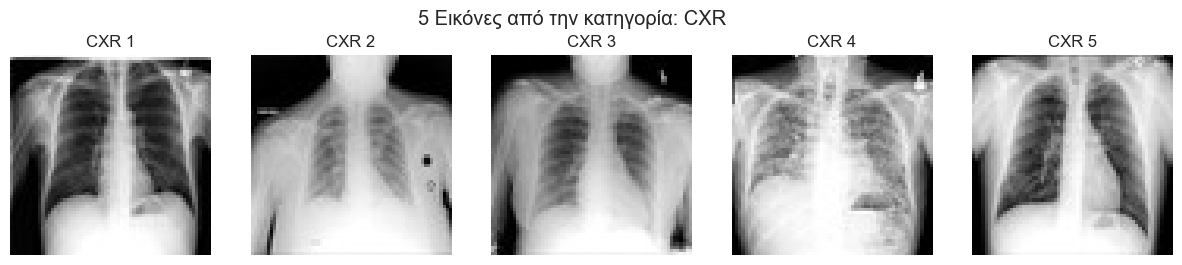

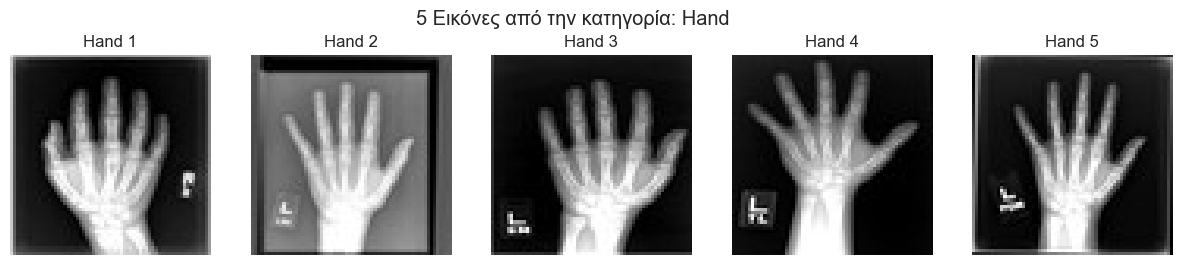

In [62]:
def plot_first_5_images_per_class(X, y, categories):
    for category in categories:
        idxs = [i for i, label in enumerate(y) if label == category][:5]
        plt.figure(figsize=(15, 3))
        for i, idx in enumerate(idxs):
            plt.subplot(1, 5, i + 1)
            plt.imshow(X[idx], cmap='gray')
            plt.title(f"{category} {i+1}")
            plt.axis('off')
        plt.suptitle(f"5 Εικόνες από την κατηγορία: {category}")
        plt.show()

plot_first_5_images_per_class(X, y, my_categories)

In [63]:
import numpy as np

# Υπολογισμός των βασικών στατιστικών
mean_pixel_value = np.mean(X)
median_pixel_value = np.median(X)
std_pixel_value = np.std(X)
min_pixel_value = np.min(X)
max_pixel_value = np.max(X)

# Υπολογισμός του 25ου, 50ου και 75ου εκατοστημόριου
percentiles = np.percentile(X, [25, 50, 75])

print(f"Μέση τιμή pixel: {mean_pixel_value}")
print(f"Διάμεσος: {median_pixel_value}")
print(f"Τυπική απόκλιση: {std_pixel_value}")
print(f"Ελάχιστη τιμή: {min_pixel_value}")
print(f"Μέγιστη τιμή: {max_pixel_value}")
print(f"25ο, 50ο, 75ο εκατοστημόριο: {percentiles}")

Μέση τιμή pixel: 94.17698467970415
Διάμεσος: 123.0
Τυπική απόκλιση: 78.59970893654427
Ελάχιστη τιμή: 0
Μέγιστη τιμή: 255
25ο, 50ο, 75ο εκατοστημόριο: [  7. 123. 139.]


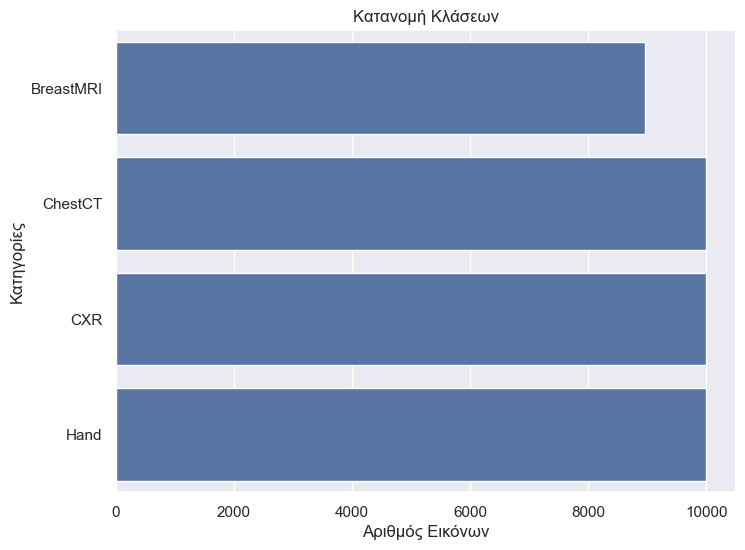

In [64]:
import matplotlib.pyplot as plt

# Ανάλυση κατανομής των κατηγοριών
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(y=y)  # Χρησιμοποιούμε το y για τις ετικέτες
plt.title('Κατανομή Κλάσεων')
plt.xlabel('Αριθμός Εικόνων')
plt.ylabel('Κατηγορίες')
plt.show()


Αρχικά πραγματοποιήθηκε τυποποίηση των pixel τιμών μέσω της μεθόδου StandardScaler, προκειμένου να διασφαλιστεί ότι κάθε χαρακτηριστικό έχει μέση τιμή 0 και τυπική απόκλιση 1.

Ακολούθως, αναλύθηκαν οι κατανομές μέσω boxplots για κάθε κατηγορία. Παρά την τυποποίηση, διαπιστώθηκε η παρουσία ακραιών τιμών (outliers), οι οποίες εντοπίστηκαν με χρήση του κανόνα IQR (Q1 – 1.5IQR, Q3 + 1.5IQR). Ο αριθμός των outliers ήταν ~7.750, κάτι το οποίο θεωρείται αναμενόμενο λόγω της φύσης των δεδομένων εικόνας.

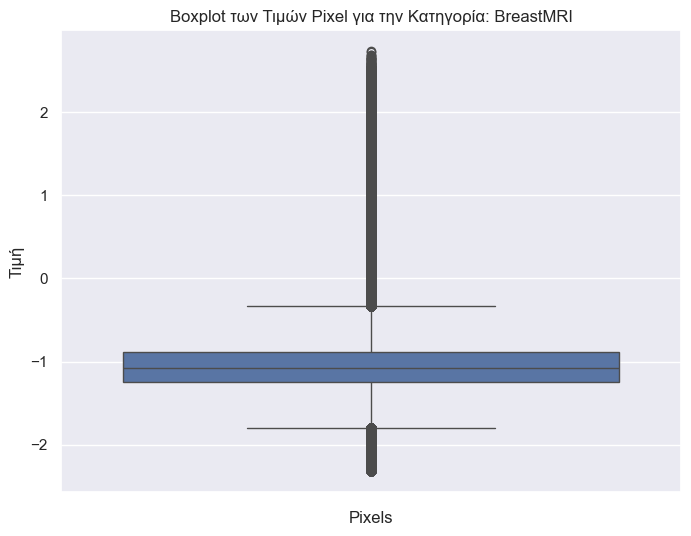

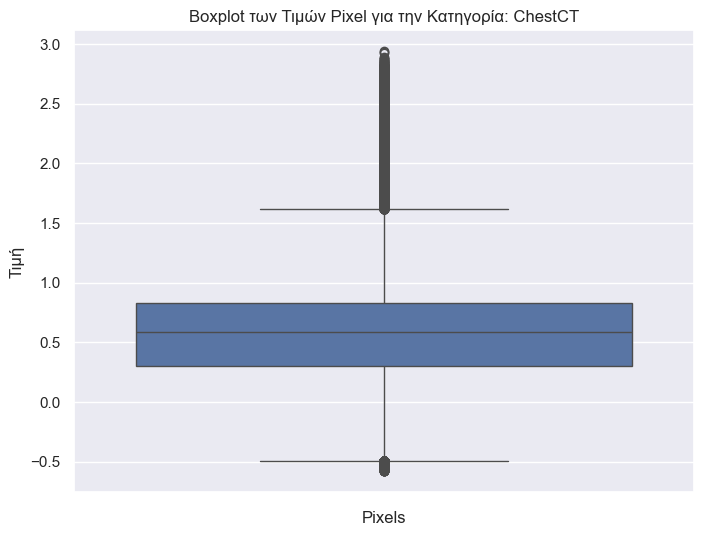

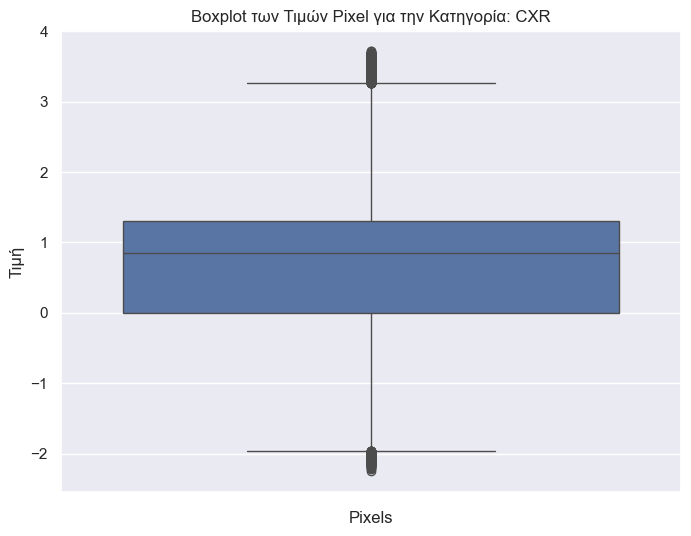

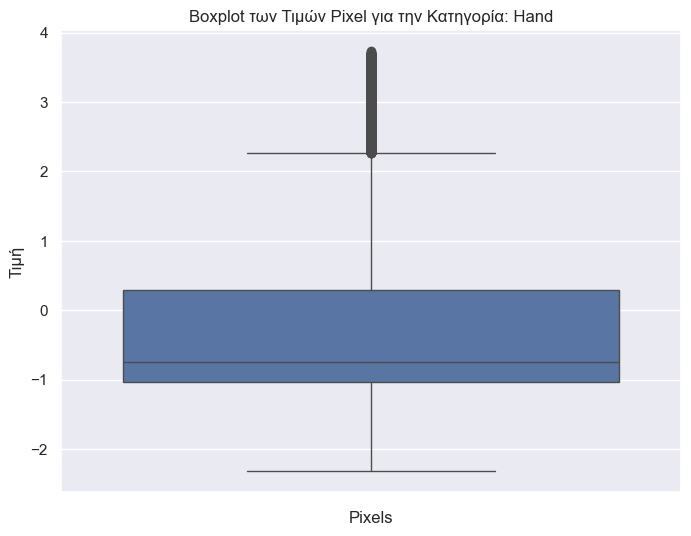

In [65]:
# Εισαγωγή της βιβλιοθήκης seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Κανονικοποίηση/Τυποποίηση των εικόνων
X_reshaped = X.reshape(X.shape[0], -1)  # Αναδιάταξη των εικόνων σε ένα επίπεδο (καθε εικόνα 64x64 γίνεται σε έναν πίνακα 4096)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_reshaped)  # Τυποποίηση

# Δημιουργία boxplot για κάθε κατηγορία
for category in my_categories:
    idxs = [i for i, label in enumerate(y) if label == category]
    
    # Λάβετε μόνο τα πρώτα 500 στοιχεία από κάθε κατηγορία (για να επιταχύνετε την επεξεργασία)
    category_data = X_normalized[idxs[:500]].reshape(-1)  # Παίρνουμε μόνο τα πρώτα 500 pixels της κατηγορίας
    
    # Δημιουργία boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=category_data)  # Δημιουργία boxplot για τα pixel της κατηγορίας
    plt.title(f'Boxplot των Τιμών Pixel για την Κατηγορία: {category}')
    plt.xlabel('Pixels')
    plt.ylabel('Τιμή')
    plt.show()

    # Αποθήκευση του boxplot ως εικόνα για μελλοντική χρήση
    plt.savefig(f'{category}_boxplot.png')
    plt.close()  # Κλείσιμο της εικόνας για να αποδεσμευτεί η μνήμη


Οι εν λόγω τιμές δεν αφαιρέθηκαν καθώς θεωρούνται τμήμα της χρήσιμης πληροφορίας (π.χ. έντονα φωτεινές ή σκοτεινές περιοχές της εικόνας) και όχι σφάλματα μέτρησης. Επιπλέον, η χρήση robust scaling δεν κρίθηκε αναγκαία καθώς η StandardScaler απέδωσε ικανοποιητικά και τα μοντέλα είναι αρκετά ανθεκτικά σε τέτοια outliers. Πραγματοποιήθηκε επίσης έλεγχος για ελλείπουσες τιμές (NaN) και δεν εντοπίστηκε καμία. 

In [66]:
import numpy as np

# Μετατροπή του X (εικόνες) σε μονοδιάστατο πίνακα για να αναλύσουμε όλα τα δεδομένα
all_pixels = X_normalized.reshape(-1)  # Μετατροπή όλων των εικόνων σε μονοδιάστατο πίνακα

# Υπολογισμός των στατιστικών
Q1 = np.percentile(all_pixels, 25)
Q3 = np.percentile(all_pixels, 75)
median = np.median(all_pixels)
IQR = Q3 - Q1

# Υπολογισμός των ακραιών τιμών
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = all_pixels[(all_pixels < lower_bound) | (all_pixels > upper_bound)]

# Εκτύπωση των στατιστικών και των ακραιών τιμών
print(f"Στατιστικά για όλες τις εικόνες:")
print(f"  25ο Πεντημόριο (Q1): {Q1:.4f}")
print(f"  Διάμεσος (Median): {median:.4f}")
print(f"  75ο Πεντημόριο (Q3): {Q3:.4f}")
print(f"  Εύρος IQR: {IQR:.4f}")
print(f"  Κατώτατο όριο (Lower Bound): {lower_bound:.4f}")
print(f"  Ανώτατο όριο (Upper Bound): {upper_bound:.4f}")
print(f"  Συνολικός αριθμός ακραιών τιμών (Outliers): {len(outliers)}")
print(f"Ελάχιστη τιμή pixel: {all_pixels.min()}")
print(f"Μέγιστη τιμή pixel: {all_pixels.max()}")
print(f"  Πρώτες 10 ακραιές τιμές (Outliers): {outliers[:10]}")

Στατιστικά για όλες τις εικόνες:
  25ο Πεντημόριο (Q1): -0.9763
  Διάμεσος (Median): 0.1027
  75ο Πεντημόριο (Q3): 0.8236
  Εύρος IQR: 1.7999
  Κατώτατο όριο (Lower Bound): -3.6761
  Ανώτατο όριο (Upper Bound): 3.5235
  Συνολικός αριθμός ακραιών τιμών (Outliers): 7750
Ελάχιστη τιμή pixel: -2.319106606967984
Μέγιστη τιμή pixel: 3.731646965612793
  Πρώτες 10 ακραιές τιμές (Outliers): [3.5705808  3.56406764 3.56211446 3.60300324 3.55152759 3.55725103
 3.53808025 3.62595531 3.59861131 3.57967407]


In [67]:
missing_values = np.isnan(X_normalized)  # Για πίνακες numpy
print(f"Συνολικός αριθμός ελλειπουσών τιμών: {missing_values.sum()}")

Συνολικός αριθμός ελλειπουσών τιμών: 0


Προχωράμε στην επιλογή και τον μετασχηματισμό των χαρακτηριστικών ώστε να κρατήσουμε τα πιο χρήσιμα χαρακτηριστικά, να δημιουργήσουμε νέα, πιο εκφραστικά και να προετοιμάσουμε το dataset για καλύτερη απόδοση των μοντέλων.

In [68]:
from sklearn.feature_selection import VarianceThreshold

# Αφαίρεση χαρακτηριστικών με διακύμανση μικρότερη από 0.01
selector = VarianceThreshold(threshold=0.01)
X_reduced_var = selector.fit_transform(X_normalized)

print(f"Αρχικός αριθμός χαρακτηριστικών: {X_normalized.shape[1]}")
print(f"Αριθμός χαρακτηριστικών μετά τη μείωση: {X_reduced_var.shape[1]}")

Αρχικός αριθμός χαρακτηριστικών: 4096
Αριθμός χαρακτηριστικών μετά τη μείωση: 4096


 Παρατηρούμε ότι μετά τη μείωση των χαρακτηριστικών με διακύμανση μικρότερη από 0.01, παρέμειναν 4096, οπότε μπορούμε να παραλείψουμε το συγκεκριμένο feature engineering, καθώς το dataset μας ήδη έχει 4096 χαρακτηριστικά, και μπορούμε να εφαρμόσουμε μείωση διαστάσεων χωρίς να προσθέσουμε επιπλέον χαρακτηριστικά.

In [69]:
import os
import shutil
from pathlib import Path
import random

src_dir = './archive'  # Διαδρομή για το φάκελο με τα δεδομένα
dest_dir = './archive_small'  # Διαδρομή για το φάκελο προορισμού
my_categories = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']
max_images_per_class = 150

# Δημιουργία του φακέλου προορισμού αν δεν υπάρχει
os.makedirs(dest_dir, exist_ok=True)

# Επεξεργασία μόνο των κατηγοριών που έχουμε καθορίσει
for class_name in os.listdir(src_dir):
    if class_name in my_categories:  # Ελέγχουμε αν η κατηγορία είναι στην λίστα μας
        class_path = os.path.join(src_dir, class_name)
        if os.path.isdir(class_path):
            dest_class_path = os.path.join(dest_dir, class_name)
            os.makedirs(dest_class_path, exist_ok=True)

            # Βρίσκουμε όλες τις εικόνες για την κατηγορία
            all_images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            
            # Επιλέγουμε τυχαία εικόνες με περιορισμό στον αριθμό
            selected_images = random.sample(all_images, min(max_images_per_class, len(all_images)))

            # Αντιγραφή των επιλεγμένων εικόνων στον φάκελο προορισμού
            for img in selected_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(dest_class_path, img))

In [144]:
# Load images and labels
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
input_dir = './archive_small'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    # img = img.resize((128, 128))  # Resize to 128x128
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")

Loaded 600 images.
Image shape: (64, 64) 
Labels: ['BreastMRI' 'CXR' 'ChestCT' 'Hand']


In [145]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Ορισμός τυχαίας αρχής για αναπαραγωγιμότητα
random_state = 42

# Πρώτα, χωρίζουμε σε Train (70%) και Temp (30% - επικύρωση + δοκιμή)
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.3, random_state=random_state, stratify=labels
)

# Στη συνέχεια, χωρίζουμε το temp σε Validation (20%) και Test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33, random_state=random_state, stratify=y_temp
)

# Εκτύπωση των σχημάτων των συνόλων
print(f"Shape Train set: {X_train.shape}, labels: {y_train.shape}")
print(f"Shape Validation set: {X_val.shape}, labels: {y_val.shape}")
print(f"Shape Test set: {X_test.shape}, labels:{y_test.shape}")

# Υπολογισμός των αριθμών εικόνας ανά κατηγορία για κάθε σετ
train_counts = Counter(y_train)
val_counts = Counter(y_val)
test_counts = Counter(y_test)

# Εκτύπωση των αποτελεσμάτων
print("\nΑριθμός εικόνων ανά κατηγορία για το Training set:")
for category, count in train_counts.items():
    print(f"{category}: {count}")

print("\nΑριθμός εικόνων ανά κατηγορία για το Validation set:")
for category, count in val_counts.items():
    print(f"{category}: {count}")

print("\nΑριθμός εικόνων ανά κατηγορία για το Test set:")
for category, count in test_counts.items():
    print(f"{category}: {count}")

Shape Train set: (420, 64, 64), labels: (420,)
Shape Validation set: (120, 64, 64), labels: (120,)
Shape Test set: (60, 64, 64), labels:(60,)

Αριθμός εικόνων ανά κατηγορία για το Training set:
ChestCT: 105
CXR: 105
Hand: 105
BreastMRI: 105

Αριθμός εικόνων ανά κατηγορία για το Validation set:
BreastMRI: 30
CXR: 30
Hand: 30
ChestCT: 30

Αριθμός εικόνων ανά κατηγορία για το Test set:
CXR: 15
BreastMRI: 15
ChestCT: 15
Hand: 15


Πρώτα, εκπαιδεύουμε με τα δεδομένα χωρίς να κάνουμε μείωση διαστάσεων και αξιολογούμε την απόδοση ώστε να έχουμε μέτρο σύγκρισης.

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Flatten τα δεδομένα για το Training Set
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Εκπαίδευση Logistic Regression πάνω στα αρχικά δεδομένα
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_flattened, y_train)  # Εκπαίδευση με τα αρχικά δεδομένα

# Προβλέψεις για το Training Set
y_pred_train = clf.predict(X_train_flattened)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Προβλέψεις για το Validation Set
y_pred_val = clf.predict(X_val_flattened)
val_accuracy = accuracy_score(y_val, y_pred_val)

# Προβλέψεις για το Test Set
y_pred_test = clf.predict(X_test_flattened)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy without PCA: {train_accuracy:.4f}")
print(f"Validation Accuracy without PCA: {val_accuracy:.4f}")
print(f"Test Accuracy without PCA: {test_accuracy:.4f}")

# Εκτύπωση Classification Report για τα αποτελέσματα του Training Set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Εκτύπωση Classification Report για τα αποτελέσματα του Validation Set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))

# Εκτύπωση Classification Report για τα αποτελέσματα του Test Set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Train Accuracy without PCA: 1.0000
Validation Accuracy without PCA: 1.0000
Test Accuracy without PCA: 0.9667

Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       1.00      1.00      1.00       105
     ChestCT       1.00      1.00      1.00       105
        Hand       1.00      1.00      1.00       105

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420


Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00        30
         CXR       1.00      1.00      1.00        30
     ChestCT       1.00      1.00      1.00        30
        Hand       1.00      1.00      1.00        30

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00   

Εφαρμόζουμε PCA

Original shape (Train): (420, 4096)
PCA reduced shape (Train): (420, 50)


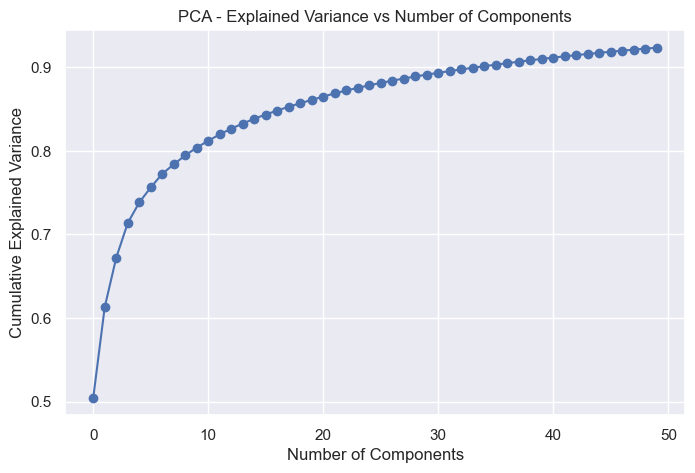

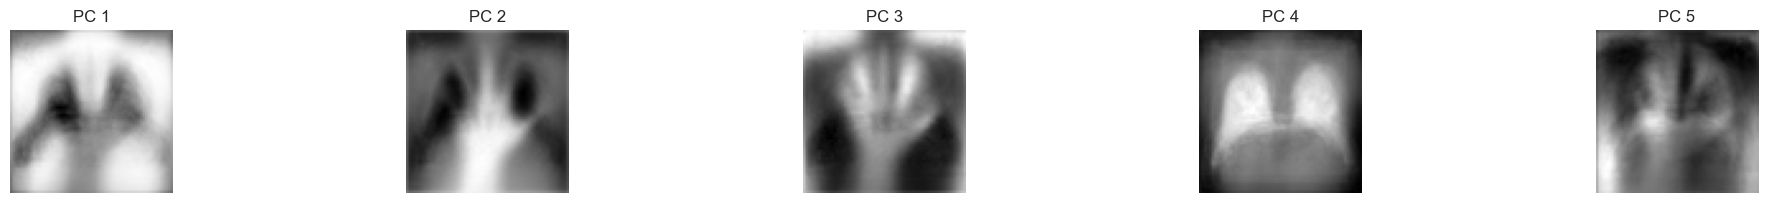

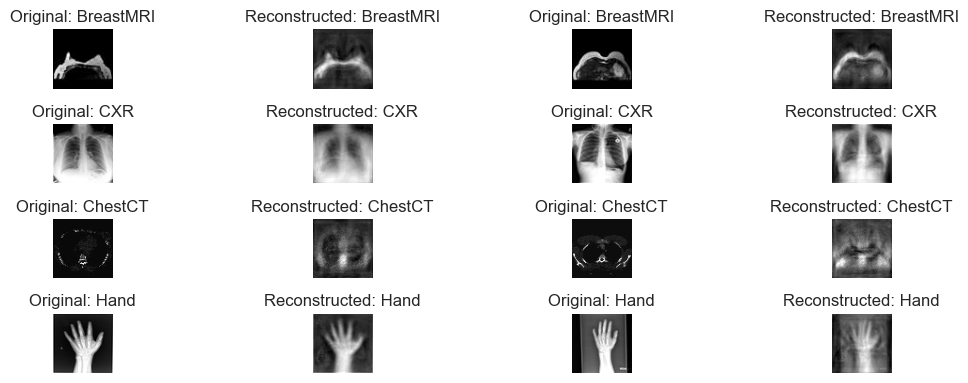

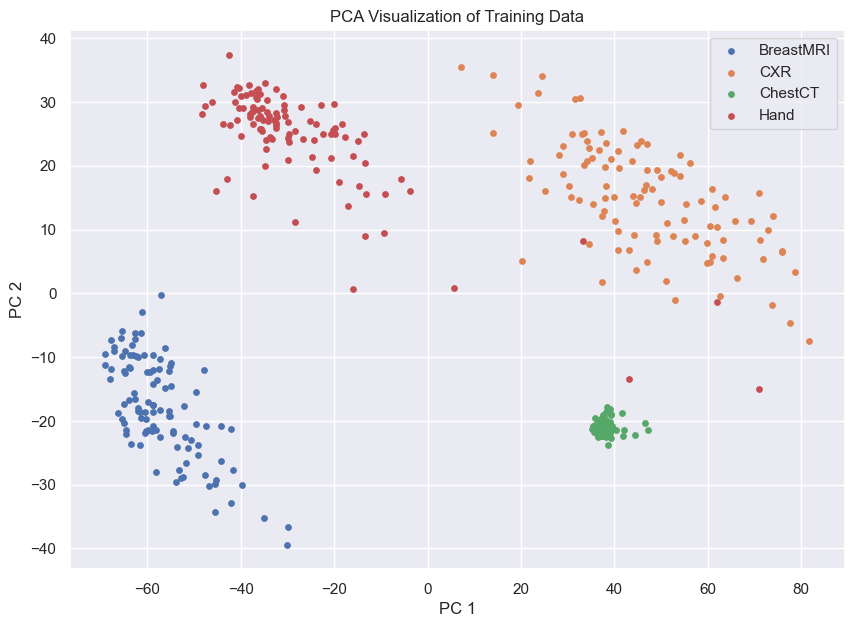

Original shape (Validation): (120, 4096)
PCA reduced shape (Validation): (120, 50)
Original shape (Test): (60, 4096)
PCA reduced shape (Test): (60, 50)


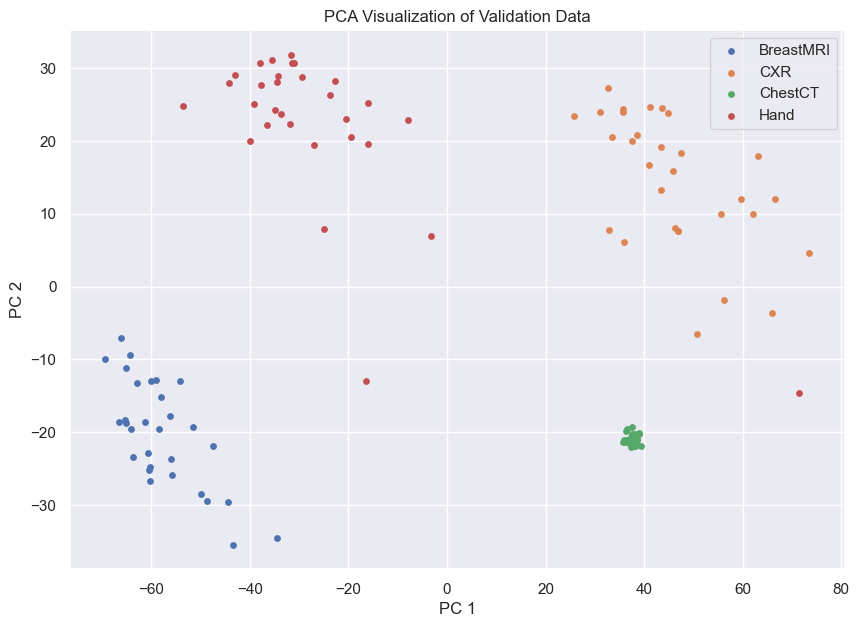

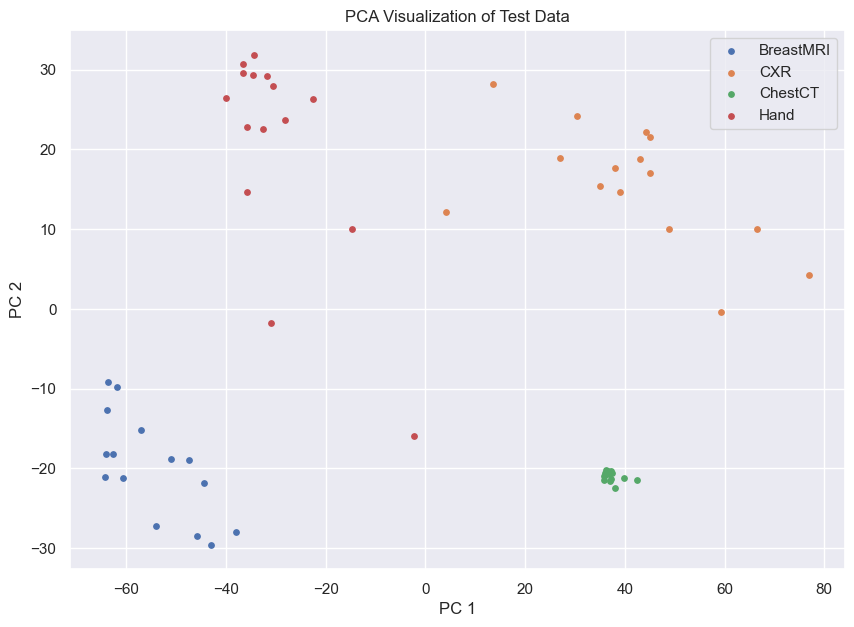

In [147]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Διαδικασία εφαρμογής PCA στο Training Set
num_samples = X_train.shape[0]
flattened_images = X_train.reshape(num_samples, -1)

# Standardize τα δεδομένα
scaler = StandardScaler()
flattened_images_std = scaler.fit_transform(flattened_images)

# Εφαρμογή PCA με 50 κύριες συνιστώσες
n_components = 50
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flattened_images_std)

# Αποθήκευση των αποτελεσμάτων PCA για το Training Set
X_train_pca = principal_components

# Εκτύπωση του σχήματος των δεδομένων πριν και μετά το PCA
print(f"Original shape (Train): {flattened_images.shape}")
print(f"PCA reduced shape (Train): {X_train_pca.shape}")

# Οπτικοποίηση της εξηγημένης διακύμανσης από το PCA
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Οπτικοποίηση των πρώτων 5 κύριων συνιστωσών
plt.figure(figsize=(20, 4))
for i in range(5):     
    plt.subplot(2, 5, i + 1)
    component = pca.components_[i].reshape(X_train[0].shape)  # Σχήμα εικόνας
    plt.imshow(component, cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Αντίστροφη μετασχηματισμός για την ανακατασκευή των εικόνων από το PCA
reconstructed = pca.inverse_transform(X_train_pca)
reconstructed_images = scaler.inverse_transform(reconstructed)
reconstructed_images = reconstructed_images.reshape(X_train.shape)

# Οπτικοποίηση 2 εικόνων ανά κατηγορία: original vs reconstructed
unique_classes = np.unique(y_train)
images_per_class = 2

plt.figure(figsize=(10, 4))  # Μεγαλύτερες εικόνες
plot_idx = 1
for class_label in unique_classes:
    class_indices = np.where(y_train == class_label)[0][:images_per_class]
    for i, idx in enumerate(class_indices):
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.title(f"Original: {class_label}")
        plt.axis('off')
        plot_idx += 1

        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(reconstructed_images[idx], cmap='gray')
        plt.title(f"Reconstructed: {class_label}")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

# Οπτικοποίηση του Training Set μετά την εφαρμογή PCA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label=class_label, s=15)
plt.title("PCA Visualization of Training Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

# Εφαρμογή PCA στο Validation και Test Set
X_val_flattened = X_val.reshape(X_val.shape[0], -1)  # Flatten το validation set
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # Flatten το test set

X_val_std = scaler.transform(X_val_flattened)
X_test_std = scaler.transform(X_test_flattened)

X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

# Εκτύπωση των σχημάτων για Validation και Test
print(f"Original shape (Validation): {X_val_flattened.shape}")
print(f"PCA reduced shape (Validation): {X_val_pca.shape}")
print(f"Original shape (Test): {X_test_flattened.shape}")
print(f"PCA reduced shape (Test): {X_test_pca.shape}")

# Οπτικοποίηση του Validation Set μετά την εφαρμογή PCA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_val):
    idx = np.where(y_val == class_label)
    plt.scatter(X_val_pca[idx, 0], X_val_pca[idx, 1], label=class_label, s=15)
plt.title("PCA Visualization of Validation Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

# Οπτικοποίηση του Test Set μετά την εφαρμογή PCA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_test):
    idx = np.where(y_test == class_label)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label=class_label, s=15)
plt.title("PCA Visualization of Test Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Εκπαίδευση Logistic Regression πάνω στα δεδομένα μετά την εφαρμογή PCA
clf_pca = LogisticRegression(max_iter=10000)
clf_pca.fit(X_train_pca, y_train)  # Εκπαίδευση με τα δεδομένα που έχουν μειωθεί μέσω PCA

# Προβλέψεις για το Training Set
y_pred_train_pca = clf_pca.predict(X_train_pca)
train_accuracy_pca = accuracy_score(y_train, y_pred_train_pca)

# Προβλέψεις για το Validation Set
y_pred_val_pca = clf_pca.predict(X_val_pca)
val_accuracy_pca = accuracy_score(y_val, y_pred_val_pca)

# Προβλέψεις για το Test Set
y_pred_test_pca = clf_pca.predict(X_test_pca)
test_accuracy_pca = accuracy_score(y_test, y_pred_test_pca)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy with PCA: {train_accuracy_pca:.4f}")
print(f"Validation Accuracy with PCA: {val_accuracy_pca:.4f}")
print(f"Test Accuracy with PCA: {test_accuracy_pca:.4f}")

# Εκτύπωση του Classification Report για το Training Set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_pca))

# Εκτύπωση Classification Report για Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val_pca))

# Εκτύπωση του Classification Report για το Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_pca))

# Εκτύπωση του Confusion Matrix για το Training Set
print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, y_pred_train_pca))

# Print Confusion Matrix for Validation Set
print("Confusion Matrix for Validation Set:")
print(confusion_matrix(y_val, y_pred_val_pca))

# Εκτύπωση του Confusion Matrix για το Test Set
print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_test_pca))




Train Accuracy with PCA: 1.0000
Validation Accuracy with PCA: 1.0000
Test Accuracy with PCA: 0.9667
Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       1.00      1.00      1.00       105
     ChestCT       1.00      1.00      1.00       105
        Hand       1.00      1.00      1.00       105

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00        30
         CXR       1.00      1.00      1.00        30
     ChestCT       1.00      1.00      1.00        30
        Hand       1.00      1.00      1.00        30

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
wei

Παρατηρούμε ότι παρόλο που το PCA έχει μειώσει τις διαστάσεις από 4096 σε 50, δεν έχει επηρεάσει αρνητικά την ικανότητα του μοντέλου να κάνει ακριβείς προβλέψεις και φαίνεται ότι το μοντέλο εξακολουθεί να γενικεύει πολύ καλά ακόμη και μετά την μείωση των διαστάσεων. Στη συνέχεια, δοκιμάζουμε να εφαρμόσουμε επίσης LDA, η οποία θα μειώσει τις διαστάσεις των δεδομένων μας, με σκοπό να μεγιστοποιήσει τη διάκριση μεταξύ των κατηγοριών (class separation). 

LDA reduced shape (Train): (420, 2)


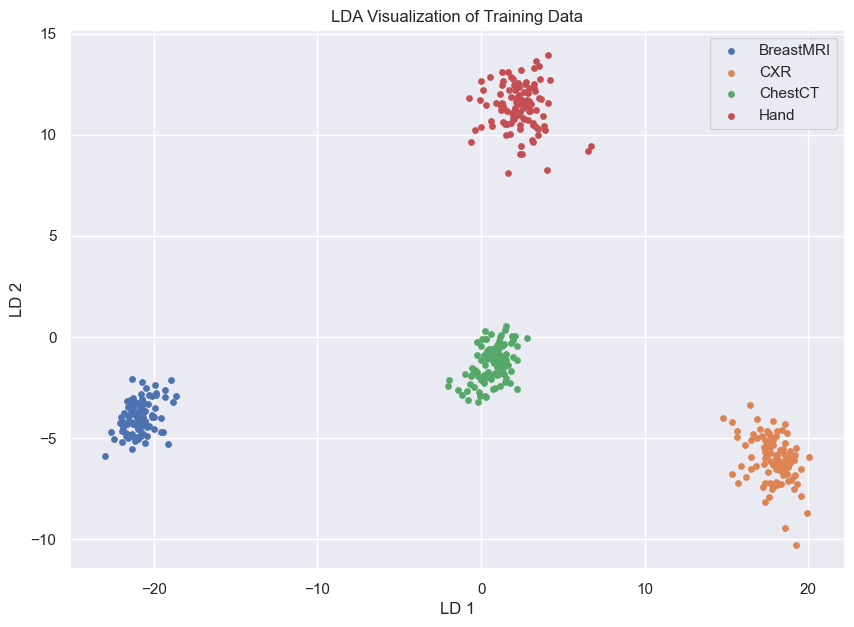

LDA reduced shape (Validation): (120, 2)
LDA reduced shape (Test): (60, 2)


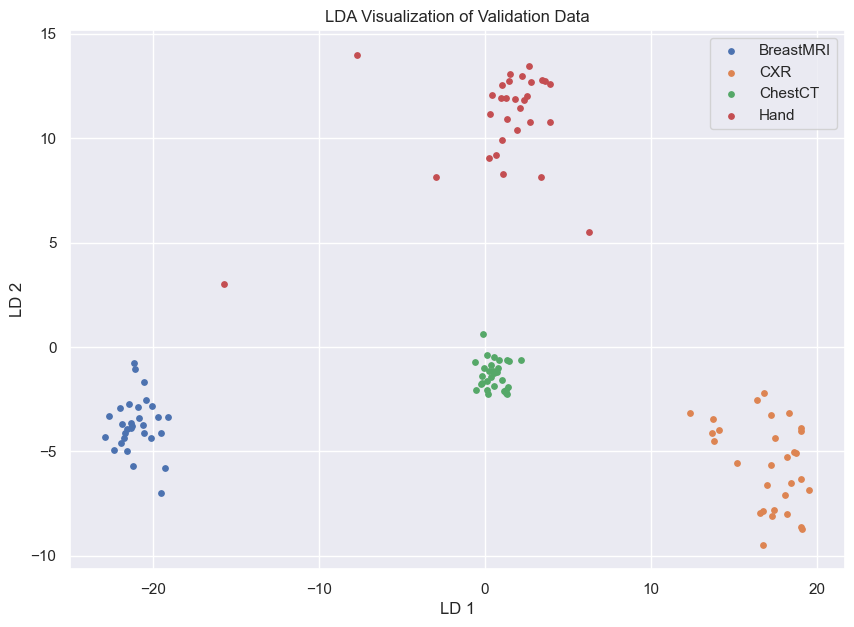

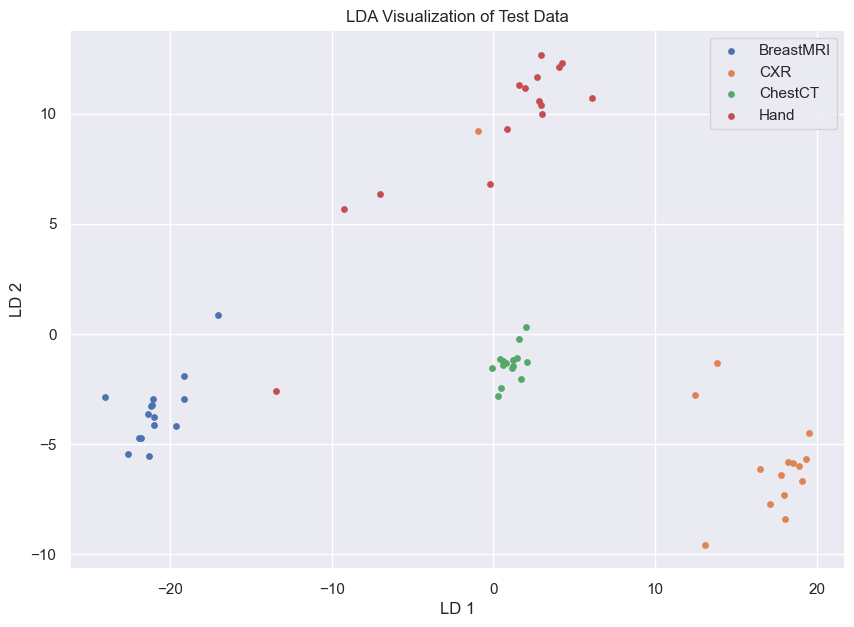

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Εφαρμογή flattening
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Εφαρμογή standardization (τυποποίηση)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flat)
X_val_standardized = scaler.transform(X_val_flat)
X_test_standardized = scaler.transform(X_test_flat)

# Εφαρμογή LDA στο Training Set 
lda = LinearDiscriminantAnalysis(n_components=2)  
X_train_lda = lda.fit_transform(X_train_standardized, y_train)  # Εκπαίδευση LDA και εφαρμογή στο Training Set

# Εκτύπωση του shape των δεδομένων μετά το LDA
print(f"LDA reduced shape (Train): {X_train_lda.shape}")

# Οπτικοποίηση των αποτελεσμάτων LDA στο εκπαιδευτικό σύνολο
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)
    plt.scatter(X_train_lda[idx, 0], X_train_lda[idx, 1], label=class_label, s=15)
plt.title("LDA Visualization of Training Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()

# Εφαρμογή LDA στο Validation Set
X_val_lda = lda.transform(X_val_standardized)

# Εφαρμογή LDA στο Test Set
X_test_lda = lda.transform(X_test_standardized)

# Εκτύπωση των σχημάτων μετά την εφαρμογή LDA για Validation και Test
print(f"LDA reduced shape (Validation): {X_val_lda.shape}")
print(f"LDA reduced shape (Test): {X_test_lda.shape}")

# Οπτικοποίηση του Validation Set μετά την εφαρμογή LDA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_val):
    idx = np.where(y_val == class_label)
    plt.scatter(X_val_lda[idx, 0], X_val_lda[idx, 1], label=class_label, s=15)
plt.title("LDA Visualization of Validation Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()

# Οπτικοποίηση του Test Set μετά την εφαρμογή LDA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_test):
    idx = np.where(y_test == class_label)
    plt.scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], label=class_label, s=15)
plt.title("LDA Visualization of Test Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()




Train Accuracy with LDA: 1.0000
Validation Accuracy with LDA: 0.9917
Test Accuracy with LDA: 0.9333
Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       1.00      1.00      1.00       105
     ChestCT       1.00      1.00      1.00       105
        Hand       1.00      1.00      1.00       105

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       0.97      1.00      0.98        30
         CXR       1.00      1.00      1.00        30
     ChestCT       1.00      1.00      1.00        30
        Hand       1.00      0.97      0.98        30

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
wei

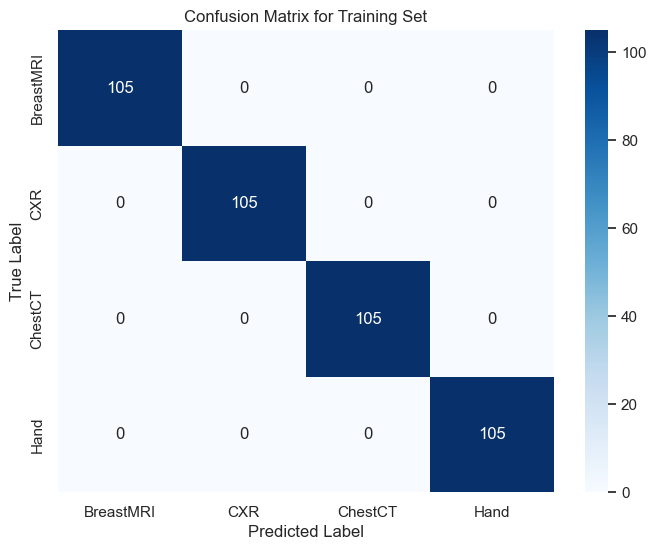

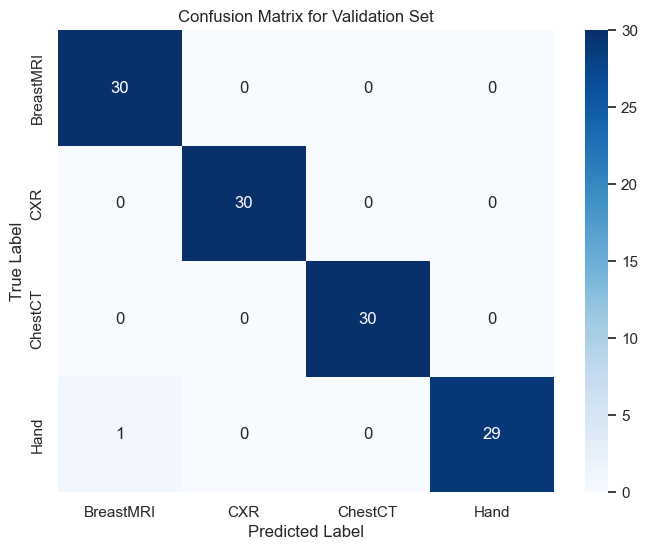

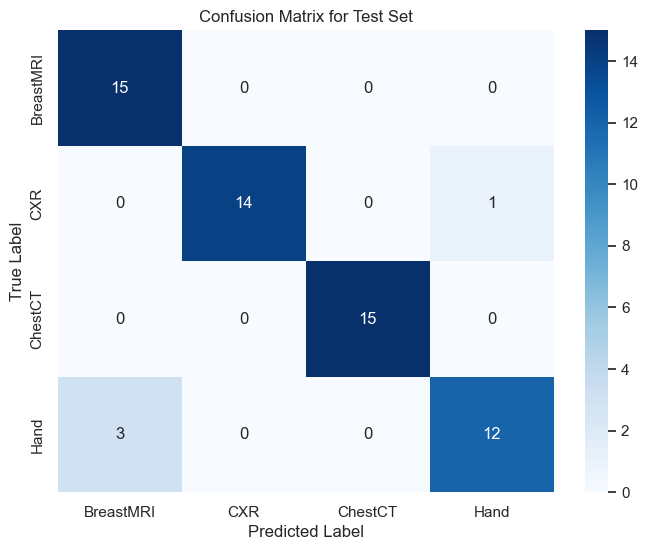

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Εκπαίδευση Logistic Regression για να δούμε τα αποτελέσματα μετά το LDA
clf_lda = LogisticRegression(max_iter=10000)
clf_lda.fit(X_train_lda, y_train)

# Προβλέψεις για το Training Set
y_pred_train_lda = clf_lda.predict(X_train_lda)
train_accuracy_lda = accuracy_score(y_train, y_pred_train_lda)

# Προβλέψεις για το Validation Set
y_pred_val_lda = clf_lda.predict(X_val_lda)
val_accuracy_lda = accuracy_score(y_val, y_pred_val_lda)

# Προβλέψεις για το Test Set
y_pred_test_lda = clf_lda.predict(X_test_lda)
test_accuracy_lda = accuracy_score(y_test, y_pred_test_lda)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy with LDA: {train_accuracy_lda:.4f}")
print(f"Validation Accuracy with LDA: {val_accuracy_lda:.4f}")
print(f"Test Accuracy with LDA: {test_accuracy_lda:.4f}")

# Εκτύπωση του Classification Report για το Training Set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_lda))

# Εκτύπωση Classification Report για Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val_lda))

# Εκτύπωση του Classification Report για το Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_lda))

# Εκτύπωση του Confusion Matrix για το Training Set
print("Confusion Matrix for Training Set:")
cm_train_lda = confusion_matrix(y_train, y_pred_train_lda)
print(cm_train_lda)

# Εκτύπωση του Confusion Matrix για το Validation Set
print("Confusion Matrix for Validation Set:")
cm_val_lda = confusion_matrix(y_val, y_pred_val_lda)
print(cm_val_lda)

# Εκτύπωση του Confusion Matrix για το Test Set
print("Confusion Matrix for Test Set:")
cm_test_lda = confusion_matrix(y_test, y_pred_test_lda)
print(cm_test_lda)

# Οπτικοποίηση του Confusion Matrix για το Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Validation Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Τόσο το PCA όσο και το LDA αποδίδουν εξαιρετικά, αλλά το PCA δείχνει λίγο καλύτερα αποτελέσματα στην ακρίβεια του validation set. Ενδεχομένως, το PCA να είναι πιο ευέλικτο στην κατηγοριοποίηση εικόνας όταν τα δεδομένα είναι πιο σύνθετα ή όταν οι κατηγορίες είναι πιο ασαφείς.

Και οι δύο μέθοδοι, ωστόσο, επιτυγχάνουν εξαιρετική γενίκευση στα δεδομένα δοκιμής και είναι αποτελεσματικές για τη συγκεκριμένη εργασία κατηγοριοποίησης εικόνας. Ας δοκιμάσουμε και t-SNE

Original shapes:
X_train shape: (420, 64, 64)
X_val shape: (120, 64, 64)
X_test shape: (60, 64, 64)

Shapes after flattening:
X_train_flat shape: (420, 4096)
X_val_flat shape: (120, 4096)
X_test_flat shape: (60, 4096)

t-SNE output shapes:
X_train_tsne shape: (420, 2)


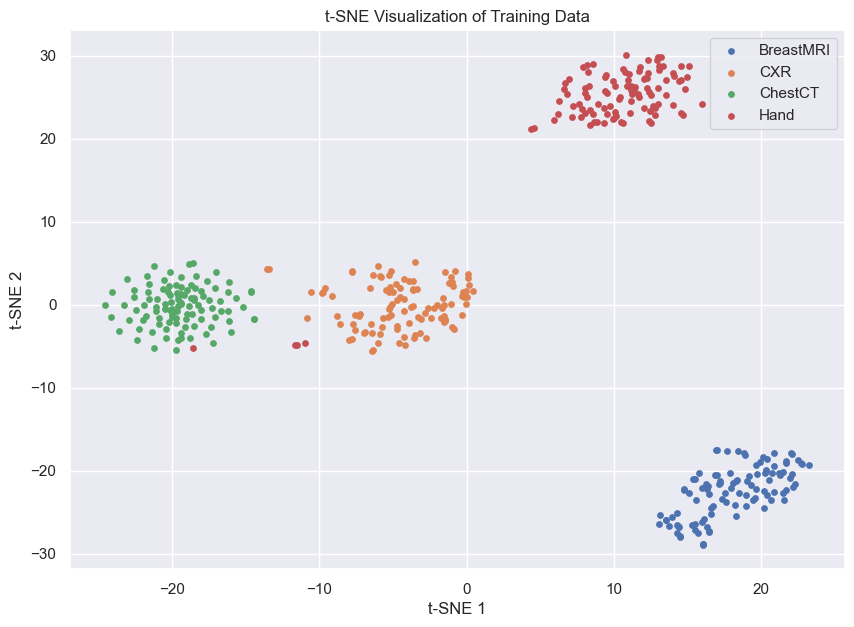

X_val_tsne shape: (120, 2)


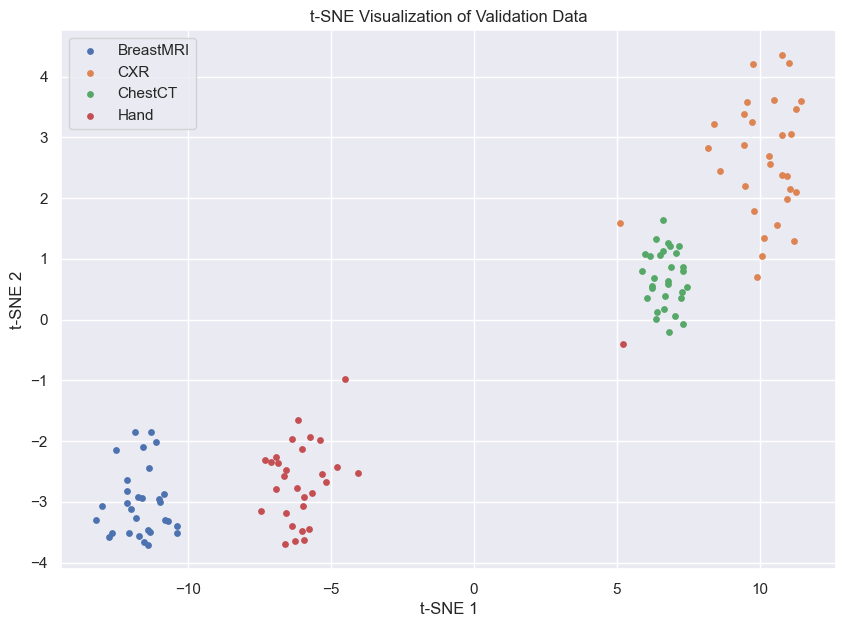

X_test_tsne shape: (60, 2)


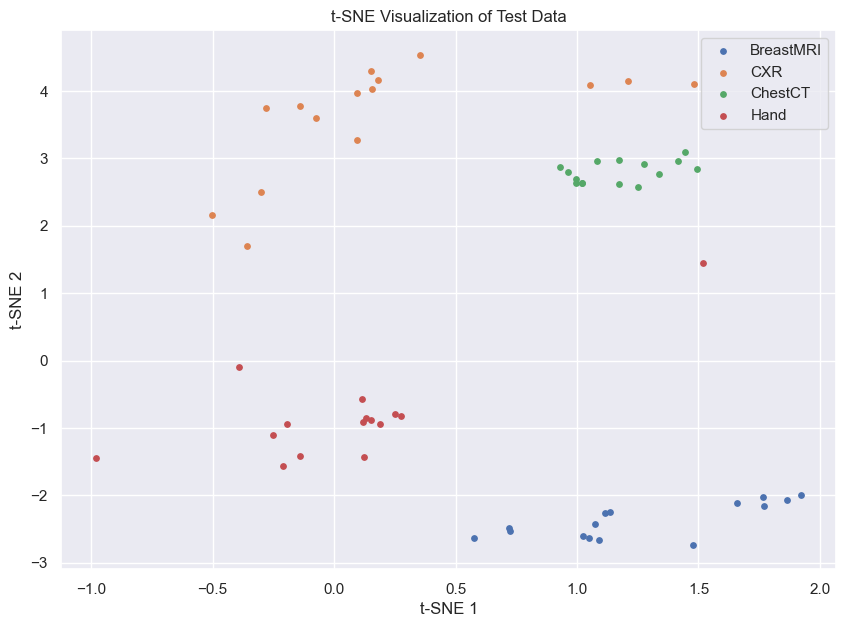

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# 1. Εμφάνιση του αρχικού σχήματος των δεδομένων
print("Original shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# 2. Εφαρμογή Flattening στα δεδομένα
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Εκτύπωση σχήματος μετά το flattening
print("\nShapes after flattening:")
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_val_flat shape: {X_val_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

# 3. Εφαρμογή Standardization (τυποποίηση) στα δεδομένα
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flat)
X_val_standardized = scaler.transform(X_val_flat)
X_test_standardized = scaler.transform(X_test_flat)

# 4. Εφαρμογή t-SNE στο Training Set (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_train_tsne = tsne.fit_transform(X_train_standardized)

# Εκτύπωση σχήματος μετά το t-SNE
print("\nt-SNE output shapes:")
print(f"X_train_tsne shape: {X_train_tsne.shape}")

# 5. Οπτικοποίηση του αποτελέσματος του t-SNE για το Training Set
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)
    plt.scatter(X_train_tsne[idx, 0], X_train_tsne[idx, 1], label=class_label, s=15)
plt.title("t-SNE Visualization of Training Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

# 6. Εφαρμογή t-SNE στο Validation Set (2D)
X_val_tsne = tsne.fit_transform(X_val_standardized)

# Εκτύπωση σχήματος για το Validation Set
print(f"X_val_tsne shape: {X_val_tsne.shape}")

# Οπτικοποίηση του αποτελέσματος του t-SNE για το Validation Set
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_val):
    idx = np.where(y_val == class_label)
    plt.scatter(X_val_tsne[idx, 0], X_val_tsne[idx, 1], label=class_label, s=15)
plt.title("t-SNE Visualization of Validation Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

# 7. Εφαρμογή t-SNE στο Test Set (2D)
X_test_tsne = tsne.fit_transform(X_test_standardized)

# Εκτύπωση σχήματος για το Test Set
print(f"X_test_tsne shape: {X_test_tsne.shape}")

# Οπτικοποίηση του αποτελέσματος του t-SNE για το Test Set
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_test):
    idx = np.where(y_test == class_label)
    plt.scatter(X_test_tsne[idx, 0], X_test_tsne[idx, 1], label=class_label, s=15)
plt.title("t-SNE Visualization of Test Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


Train Accuracy with t-SNE: 0.9857
Validation Accuracy with t-SNE: 0.2500
Test Accuracy with t-SNE: 0.2500
Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       0.97      0.98      0.98       105
     ChestCT       0.97      1.00      0.99       105
        Hand       1.00      0.96      0.98       105

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       0.00      0.00      0.00        30
         CXR       0.25      1.00      0.40        30
     ChestCT       0.00      0.00      0.00        30
        Hand       0.00      0.00      0.00        30

    accuracy                           0.25       120
   macro avg       0.06      0.25      0.10       1

c:\Users\demh_\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\demh_\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\demh_\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

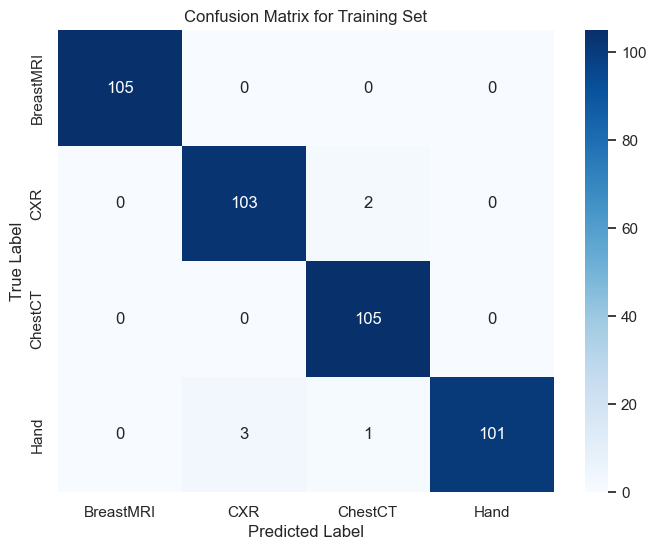

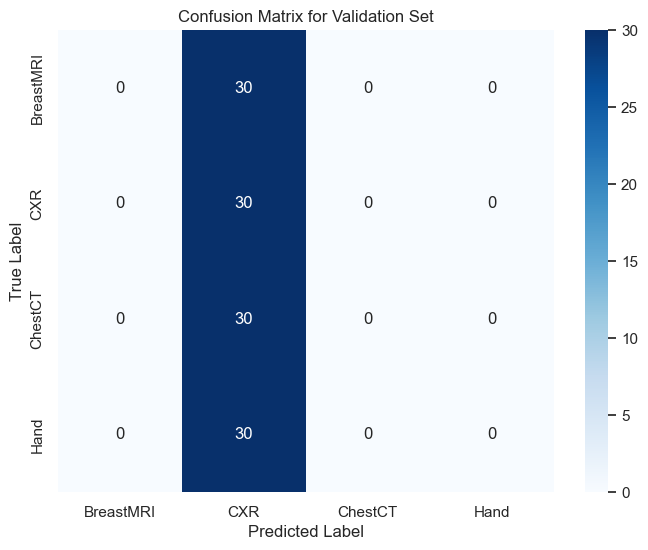

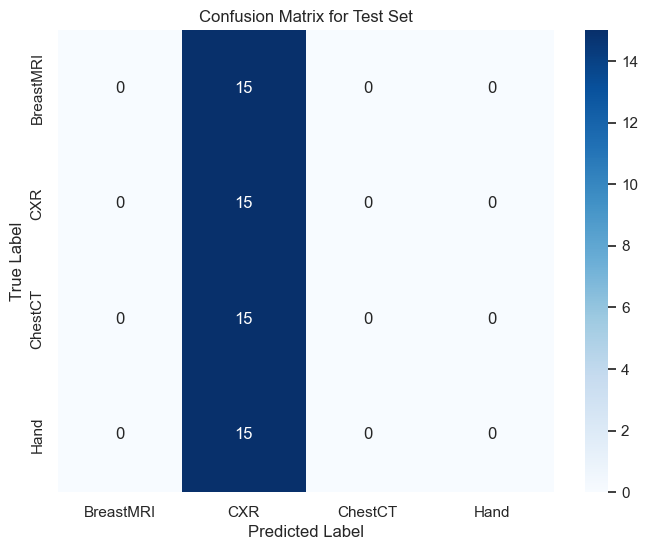

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Εκπαίδευση του Logistic Regression πάνω στα δεδομένα του t-SNE
clf_tsne = LogisticRegression(max_iter=10000)
clf_tsne.fit(X_train_tsne, y_train)

# Προβλέψεις για το Training Set
y_pred_train_tsne = clf_tsne.predict(X_train_tsne)
train_accuracy_tsne = accuracy_score(y_train, y_pred_train_tsne)

# Προβλέψεις για το Validation Set
y_pred_val_tsne = clf_tsne.predict(X_val_tsne)
val_accuracy_tsne = accuracy_score(y_val, y_pred_val_tsne)

# Προβλέψεις για το Test Set
y_pred_test_tsne = clf_tsne.predict(X_test_tsne)
test_accuracy_tsne = accuracy_score(y_test, y_pred_test_tsne)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy with t-SNE: {train_accuracy_tsne:.4f}")
print(f"Validation Accuracy with t-SNE: {val_accuracy_tsne:.4f}")
print(f"Test Accuracy with t-SNE: {test_accuracy_tsne:.4f}")

# Εκτύπωση του Classification Report για το Training Set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_tsne))

# Εκτύπωση του Classification Report για το Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val_tsne))

# Εκτύπωση του Classification Report για το Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_tsne))

# Εκτύπωση του Confusion Matrix για το Training Set
cm_train = confusion_matrix(y_train, y_pred_train_tsne)
print("Confusion Matrix for Training Set:")
print(cm_train)

# Εκτύπωση του Confusion Matrix για το Validation Set
cm_val = confusion_matrix(y_val, y_pred_val_tsne)
print("Confusion Matrix for Validation Set:")
print(cm_val)

# Εκτύπωση του Confusion Matrix για το Test Set
cm_test = confusion_matrix(y_test, y_pred_test_tsne)
print("Confusion Matrix for Test Set:")
print(cm_test)

# Οπτικοποίηση του Confusion Matrix για το Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Validation Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Παρατηρούμε ότι η Logistic Regression μετά από την εφαρμογή t-SNE στα δεδομένα δεν έχει τόσο καλή απόδοση όσο η Logistic regression στα δεδομένα που έχουν υποστεί PCA ή LDA. Αυτό μπορεί να οφείλεται στο γεγονός ότι το t-SNE είναι μια μη γραμμική μέθοδος μείωσης διαστάσεων και χρησιμοποιείται κυρίως για την οπτικοποίηση των δεδομένων. 

Δοκιμάζουμε να εφαρμόσουμε LDA πάνω στα δεδομένα που προκέκυψαν από PCA, προκειμένου να εξετάσουμε αν αυτή η μέθοδος θα μπορούσε να βελτιώσει περαιτέρω την απόδοση του μοντέλου ταξινόμησης.

LDA reduced shape (Train): (420, 2)
LDA reduced shape (Validation): (120, 2)
LDA reduced shape (Test): (60, 2)


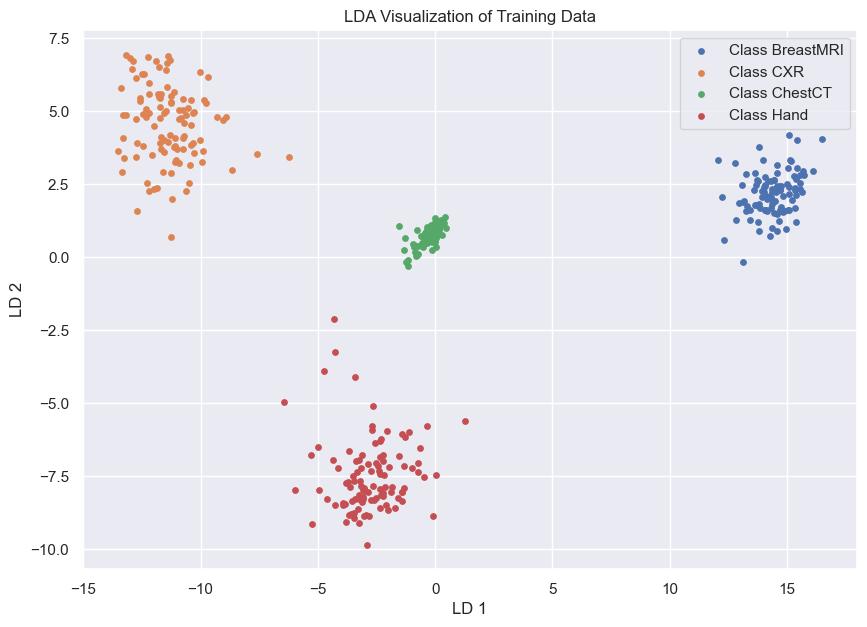

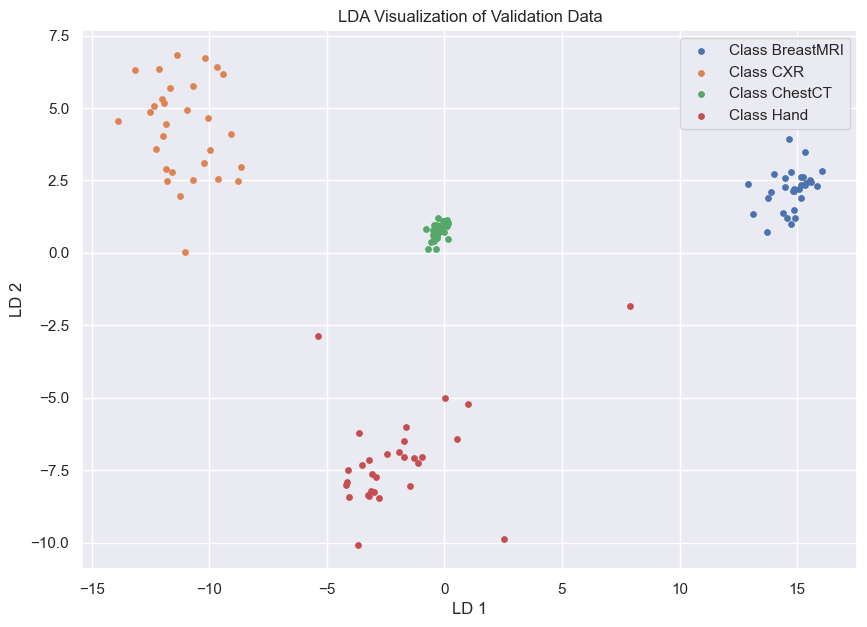

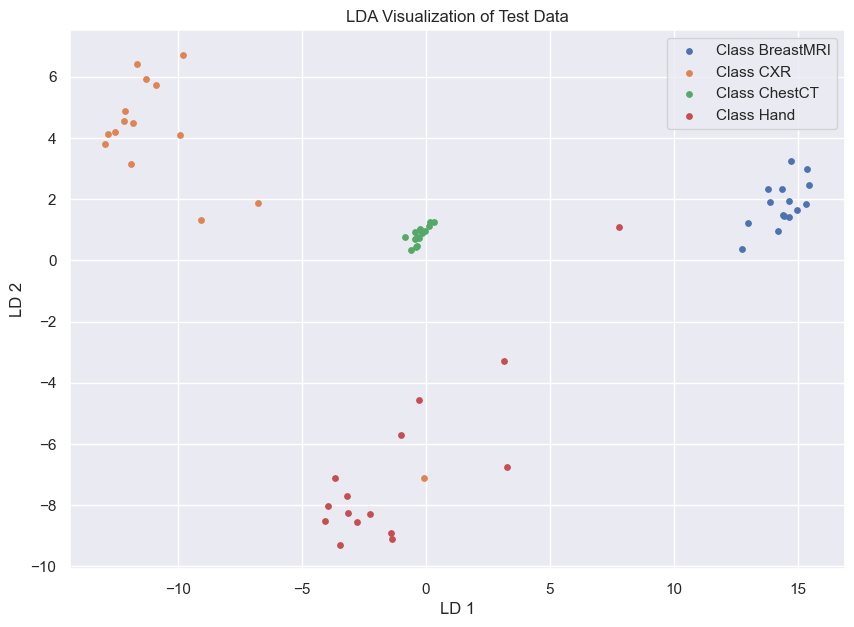

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Εφαρμογή LDA στο Training Set (Πάνω στα δεδομένα του PCA) με 2 διαστάσεις
lda = LinearDiscriminantAnalysis(n_components=2)  # Αλλάζουμε σε 2 διαστάσεις
X_train_lda = lda.fit_transform(X_train_pca, y_train)

# Εφαρμογή LDA στο Validation και Test Set
X_val_lda = lda.transform(X_val_pca)
X_test_lda = lda.transform(X_test_pca)

# Εκτύπωση των σχημάτων μετά την εφαρμογή LDA για Validation και Test
print(f"LDA reduced shape (Train): {X_train_lda.shape}")
print(f"LDA reduced shape (Validation): {X_val_lda.shape}")
print(f"LDA reduced shape (Test): {X_test_lda.shape}")

# Οπτικοποίηση των δεδομένων LDA για το Training Set
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_train):
    idx = np.where(y_train == class_label)
    plt.scatter(X_train_lda[idx, 0], X_train_lda[idx, 1], label=f"Class {class_label}", s=15)
plt.title("LDA Visualization of Training Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()

# Οπτικοποίηση του Validation Set μετά την εφαρμογή LDA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_val):
    idx = np.where(y_val == class_label)
    plt.scatter(X_val_lda[idx, 0], X_val_lda[idx, 1], label=f"Class {class_label}", s=15)
plt.title("LDA Visualization of Validation Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()

# Οπτικοποίηση του Test Set μετά την εφαρμογή LDA
plt.figure(figsize=(10, 7))
for class_label in np.unique(y_test):
    idx = np.where(y_test == class_label)
    plt.scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], label=f"Class {class_label}", s=15)
plt.title("LDA Visualization of Test Data")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend()
plt.show()


Train Accuracy with LDA: 1.0000
Validation Accuracy with LDA: 0.9917
Test Accuracy with LDA: 0.9500
Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       1.00      1.00      1.00       105
     ChestCT       1.00      1.00      1.00       105
        Hand       1.00      1.00      1.00       105

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       0.97      1.00      0.98        30
         CXR       1.00      1.00      1.00        30
     ChestCT       1.00      1.00      1.00        30
        Hand       1.00      0.97      0.98        30

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
wei

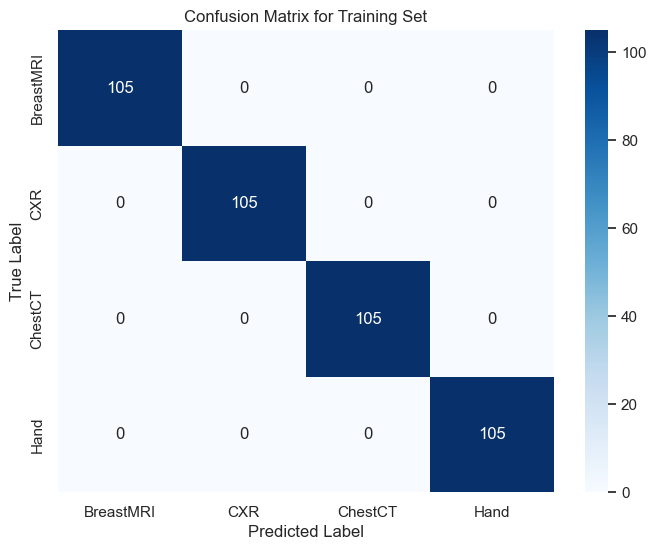

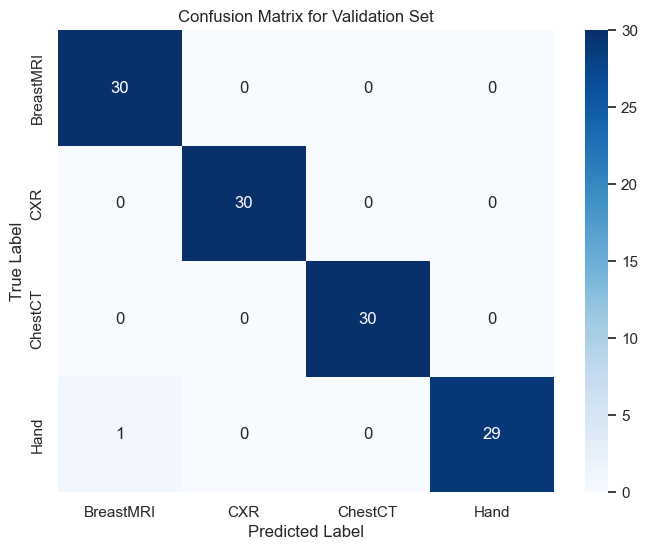

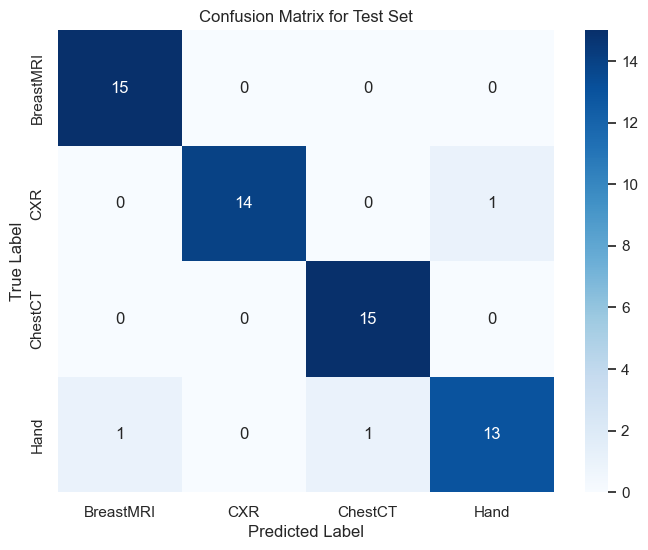

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Εκπαίδευση Logistic Regression για να δούμε τα αποτελέσματα μετά το LDA
clf_lda = LogisticRegression(max_iter=10000)
clf_lda.fit(X_train_lda, y_train)  # Εκπαίδευση του μοντέλου με τα δεδομένα LDA

# Προβλέψεις για το Training Set
y_pred_train_lda = clf_lda.predict(X_train_lda)
train_accuracy_lda = accuracy_score(y_train, y_pred_train_lda)

# Προβλέψεις για το Validation Set
y_pred_val_lda = clf_lda.predict(X_val_lda)
val_accuracy_lda = accuracy_score(y_val, y_pred_val_lda)

# Προβλέψεις για το Test Set
y_pred_test_lda = clf_lda.predict(X_test_lda)
test_accuracy_lda = accuracy_score(y_test, y_pred_test_lda)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy with LDA: {train_accuracy_lda:.4f}")
print(f"Validation Accuracy with LDA: {val_accuracy_lda:.4f}")
print(f"Test Accuracy with LDA: {test_accuracy_lda:.4f}")

# Εκτύπωση του Classification Report για το Training Set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_lda))

# Εκτύπωση Classification Report για Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val_lda))

# Εκτύπωση του Classification Report για το Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_lda))

# Εκτύπωση του Confusion Matrix για το Training Set
print("Confusion Matrix for Training Set:")
cm_train_lda = confusion_matrix(y_train, y_pred_train_lda)
print(cm_train_lda)

# Εκτύπωση του Confusion Matrix για το Validation Set
print("Confusion Matrix for Validation Set:")
cm_val_lda = confusion_matrix(y_val, y_pred_val_lda)
print(cm_val_lda)

# Εκτύπωση του Confusion Matrix για το Test Set
print("Confusion Matrix for Test Set:")
cm_test_lda = confusion_matrix(y_test, y_pred_test_lda)
print(cm_test_lda)

# Οπτικοποίηση του Confusion Matrix για το Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Validation Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lda, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Τα αποτελέσματα που προέκυψαν από την εφαρμογή της LDA πάνω στα δεδομένα που είχαν ήδη υποστεί PCA, δείχνουν εξαιρετική ακρίβεια τόσο στο training, όσο και στο validation και το test set και φαίνεται πως ο συνδυασμός των 2 αυτών τεχνικών έχει βελτιώσει σημαντικά την απόδοση του μοντέλου. Προχωράμε στους υπόλοιπους κλασικούς αλγορίθμους ταξινόμησης.

Train Accuracy with SVM (PCA + LDA): 1.0000
Validation Accuracy with SVM (PCA + LDA): 0.9917
Test Accuracy with SVM (PCA + LDA): 0.9500
Classification Report for Training Set:
              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       105
         CXR       1.00      1.00      1.00       105
     ChestCT       1.00      1.00      1.00       105
        Hand       1.00      1.00      1.00       105

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

Classification Report for Validation Set:
              precision    recall  f1-score   support

   BreastMRI       0.97      1.00      0.98        30
         CXR       1.00      1.00      1.00        30
     ChestCT       1.00      1.00      1.00        30
        Hand       1.00      0.97      0.98        30

    accuracy                           0.99       120
   macro avg       0.

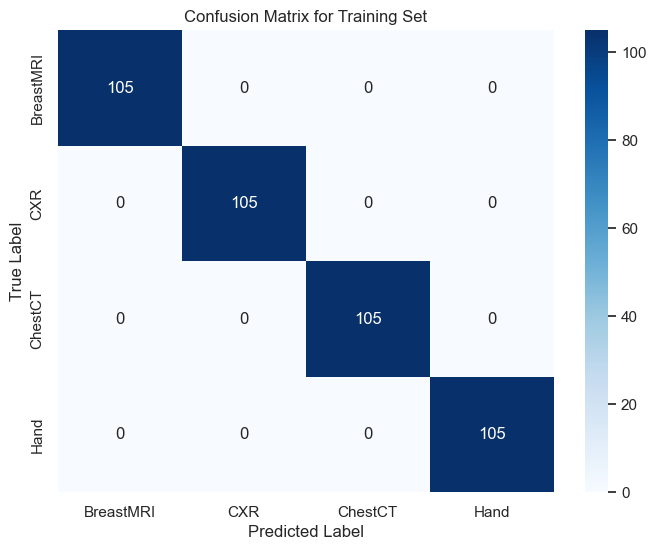

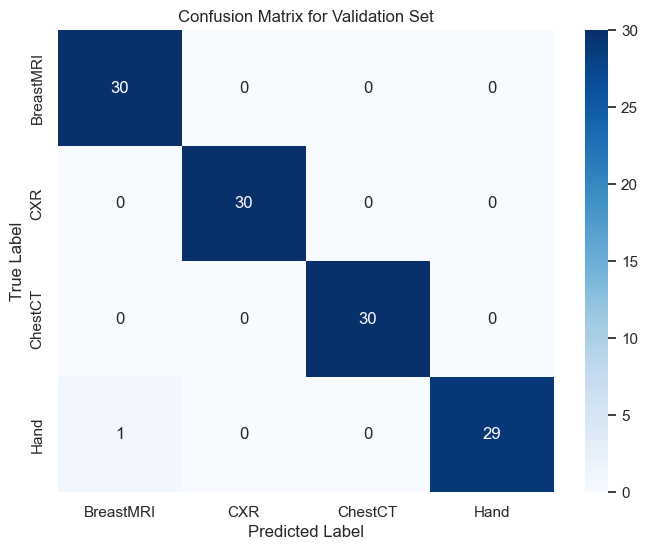

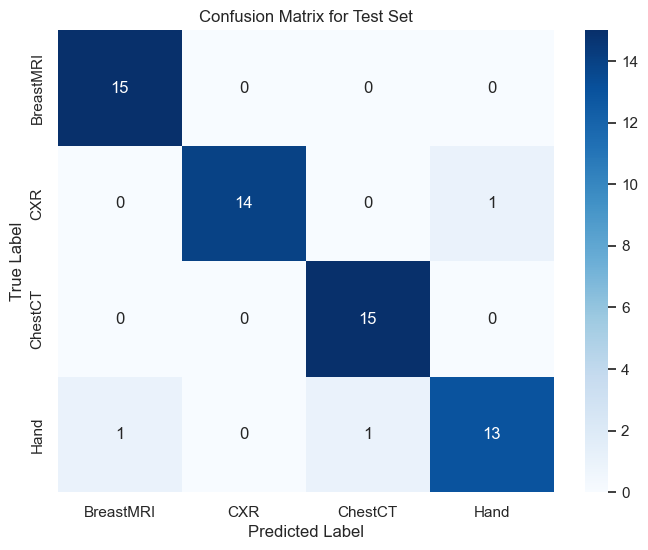

In [155]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC

# Εκπαίδευση του SVM με τα δεδομένα που προκύπτουν από το PCA και LDA
clf_svm = SVC(kernel='linear', probability=True)  # Ενεργοποιεί την πιθανότητα προβλέψεων
clf_svm.fit(X_train_lda, y_train)

# Προβλέψεις για το Training Set
y_pred_train_svm = clf_svm.predict(X_train_lda)
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)

# Προβλέψεις για το Validation Set
y_pred_val_svm = clf_svm.predict(X_val_lda)
val_accuracy_svm = accuracy_score(y_val, y_pred_val_svm)

# Προβλέψεις για το Test Set
y_pred_test_svm = clf_svm.predict(X_test_lda)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

# Εκτύπωση των αποτελεσμάτων ακρίβειας
print(f"Train Accuracy with SVM (PCA + LDA): {train_accuracy_svm:.4f}")
print(f"Validation Accuracy with SVM (PCA + LDA): {val_accuracy_svm:.4f}")
print(f"Test Accuracy with SVM (PCA + LDA): {test_accuracy_svm:.4f}")

# Εκτύπωση του Classification Report για το Training Set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train_svm))

# Εκτύπωση Classification Report για Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val_svm))

# Εκτύπωση του Classification Report για το Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test_svm))

# Εκτύπωση του Confusion Matrix για το Training Set
print("Confusion Matrix for Training Set:")
cm_train_svm = confusion_matrix(y_train, y_pred_train_svm)
print(cm_train_svm)

# Εκτύπωση του Confusion Matrix για το Validation Set
print("Confusion Matrix for Validation Set:")
cm_val_svm = confusion_matrix(y_val, y_pred_val_svm)
print(cm_val_svm)

# Εκτύπωση του Confusion Matrix για το Test Set
print("Confusion Matrix for Test Set:")
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)
print(cm_test_svm)

# Οπτικοποίηση του Confusion Matrix για το Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_svm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix for Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Validation Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_svm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix for Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Οπτικοποίηση του Confusion Matrix για το Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_svm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [158]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Ορισμός των υπερπαραμέτρων που θέλουμε να δοκιμάσουμε
param_grid = {
    'C': [0.1, 1, 10, 100],  # Παράγοντας ποινής
    'kernel': ['linear', 'rbf', 'poly'],  # Τύποι πυρήνα
    'gamma': ['scale', 'auto'],  # Παράμετρος για το RBF kernel
    'probability': [True]  # Ενεργοποίηση του predict_proba
}

# Δημιουργία του GridSearchCV με ενεργοποιημένο το probability
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Εκπαίδευση του GridSearchCV για να βρει τις καλύτερες υπερπαραμέτρους
grid_search.fit(X_train_lda, y_train)

# Εκτύπωση των καλύτερων υπερπαραμέτρων
print("Best parameters found: ", grid_search.best_params_)

# Προβλέψεις με τις βελτιστοποιημένες παραμέτρους
best_svm = grid_search.best_estimator_
y_pred_train_svm = best_svm.predict(X_train_lda)
y_pred_val_svm = best_svm.predict(X_val_lda)
y_pred_test_svm = best_svm.predict(X_test_lda)

# Εκτύπωση των αποτελεσμάτων
print(f"Train Accuracy with optimized SVM: {accuracy_score(y_train, y_pred_train_svm):.4f}")
print(f"Validation Accuracy with optimized SVM: {accuracy_score(y_val, y_pred_val_svm):.4f}")
print(f"Test Accuracy with optimized SVM: {accuracy_score(y_test, y_pred_test_svm):.4f}")

# Προβλέψεις πιθανότητας
y_pred_train_prob = best_svm.predict_proba(X_train_lda)
y_pred_val_prob = best_svm.predict_proba(X_val_lda)
y_pred_test_prob = best_svm.predict_proba(X_test_lda)

# Υπολογισμός ROC-AUC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize τις ετικέτες
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Υπολογισμός ROC-AUC
roc_auc_train = roc_auc_score(y_train_bin, y_pred_train_prob, average='macro', multi_class='ovr')
roc_auc_val = roc_auc_score(y_val_bin, y_pred_val_prob, average='macro', multi_class='ovr')
roc_auc_test = roc_auc_score(y_test_bin, y_pred_test_prob, average='macro', multi_class='ovr')

print(f"ROC-AUC for Training Set: {roc_auc_train:.4f}")
print(f"ROC-AUC for Validation Set: {roc_auc_val:.4f}")
print(f"ROC-AUC for Test Set: {roc_auc_test:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
Train Accuracy with optimized SVM: 1.0000
Validation Accuracy with optimized SVM: 0.9917
Test Accuracy with optimized SVM: 0.9500
ROC-AUC for Training Set: 1.0000
ROC-AUC for Validation Set: 0.9999
ROC-AUC for Test Set: 0.9833


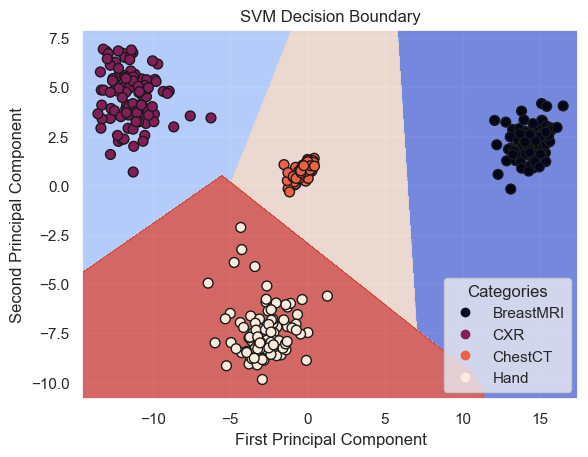

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Εκπαίδευση του SVM για την οπτικοποίηση των ορίων απόφασης
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train_2d, y_train)

# Δημιουργία grid για την οπτικοποίηση
h = .02  # Βήμα του grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Προβλέψεις για το grid
Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Επανασχηματισμός σε 2D

# Χρησιμοποιούμε LabelEncoder για να μετατρέψουμε τις κατηγορίες σε αριθμητικές τιμές
le = LabelEncoder()
Z_numeric = le.fit_transform(Z.ravel())

# Μετατρέπουμε και το y_train σε αριθμητικές τιμές για τον χρωματισμό
y_train_numeric = le.fit_transform(y_train)

# Οπτικοποίηση των ορίων απόφασης
plt.contourf(xx, yy, Z_numeric.reshape(xx.shape), alpha=0.75, cmap=plt.cm.coolwarm)  # Εμφανίζει τα όρια απόφασης

# Εμφανίζει τα δεδομένα με τα χρώματα που αντιστοιχούν στις κατηγορίες
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_numeric, edgecolors='k', marker='o', s=50)

# Προσθήκη του τίτλου και των ετικετών
plt.title("SVM Decision Boundary")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Δημιουργία legend που να δείχνει τις κατηγορίες
handles, labels = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categories")

plt.show()


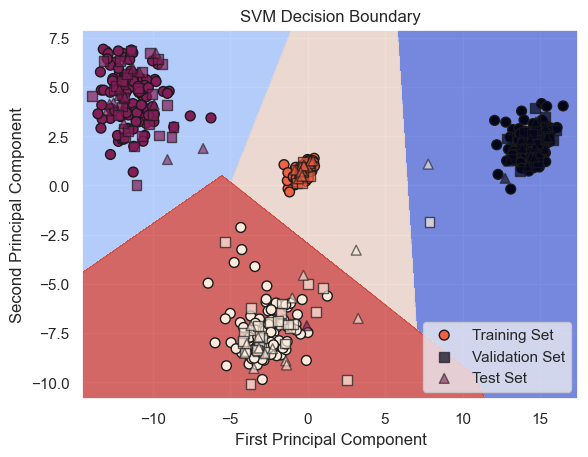

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Εκπαίδευση του SVM για την οπτικοποίηση των ορίων απόφασης
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train_2d, y_train)

# Δημιουργία grid για την οπτικοποίηση
h = .02  # Βήμα του grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Προβλέψεις για το grid
Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Επανασχηματισμός σε 2D

# Χρησιμοποιούμε LabelEncoder για να μετατρέψουμε τις κατηγορίες σε αριθμητικές τιμές
le = LabelEncoder()
Z_numeric = le.fit_transform(Z.ravel())

# Μετατρέπουμε και το y_train σε αριθμητικές τιμές για τον χρωματισμό
y_train_numeric = le.fit_transform(y_train)
y_val_numeric = le.fit_transform(y_val)
y_test_numeric = le.fit_transform(y_test)

# Οπτικοποίηση των ορίων απόφασης
plt.contourf(xx, yy, Z_numeric.reshape(xx.shape), alpha=0.75, cmap=plt.cm.coolwarm)  # Εμφανίζει τα όρια απόφασης

# Εμφανίζει τα δεδομένα του Training set με διαφορετικά σχήματα και χρώματα για κάθε κατηγορία
scatter_train = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_numeric, edgecolors='k', marker='o', s=50, label="Training Set")

# Εμφανίζει τα δεδομένα του Validation set με διαφορετικά σχήματα και χρώματα για κάθε κατηγορία
scatter_val = plt.scatter(X_val_2d[:, 0], X_val_2d[:, 1], c=y_val_numeric, edgecolors='k', marker='s', s=50, alpha=0.7, label="Validation Set")

# Εμφανίζει τα δεδομένα του Test set με διαφορετικά σχήματα και χρώματα για κάθε κατηγορία
scatter_test = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_numeric, edgecolors='k', marker='^', s=50, alpha=0.6, label="Test Set")

# Προσθήκη του τίτλου και των ετικετών
plt.title("SVM Decision Boundary")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Δημιουργία legend που να δείχνει τις κατηγορίες
handles, labels = scatter_train.legend_elements()
plt.legend(handles, le.classes_, title="Categories")

# Προσθήκη legend για τα σύνολα δεδομένων (Training, Validation, Test)
plt.legend(loc="best")

# Εμφάνιση του γραφήματος
plt.show()



In [168]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Αναδίπλωση των δεδομένων σε 2D αν τα δεδομένα είναι εικόνες ή 3D πίνακες
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Εφαρμογή PCA για μείωση διαστάσεων (πχ 50 διαστάσεις)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)
X_val_pca = pca.transform(X_val_flattened)
X_test_pca = pca.transform(X_test_flattened)

# Εφαρμογή LDA για τη μείωση σε 2 διαστάσεις για οπτικοποίηση
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_val_lda = lda.transform(X_val_pca)
X_test_lda = lda.transform(X_test_pca)

# Εκτύπωση των σχημάτων των δεδομένων μετά την εφαρμογή του LDA
print(f"LDA reduced shape (Train): {X_train_lda.shape}")
print(f"LDA reduced shape (Validation): {X_val_lda.shape}")
print(f"LDA reduced shape (Test): {X_test_lda.shape}")


# Εφαρμογή k-NN με GridSearchCV για βελτιστοποίηση του αριθμού των γειτόνων (k)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}  # Δοκιμάζουμε k από 1 έως 20
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)

# Καλύτερος αριθμός γειτόνων (k)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Εκπαίδευση του μοντέλου με τον καλύτερο αριθμό γειτόνων
best_knn = grid_search.best_estimator_

# Προβλέψεις στο Test Set
y_pred = best_knn.predict(X_test_lda)
y_pred_proba = best_knn.predict_proba(X_test_lda)

# Εκτύπωση Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Εκτύπωση Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Εκτύπωση Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Υπολογισμός ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC: {roc_auc}")


LDA reduced shape (Train): (420, 2)
LDA reduced shape (Validation): (120, 2)
LDA reduced shape (Test): (60, 2)
Best k: 1

Classification Report:
              precision    recall  f1-score   support

   BreastMRI       0.94      1.00      0.97        15
         CXR       1.00      0.93      0.97        15
     ChestCT       1.00      1.00      1.00        15
        Hand       0.93      0.93      0.93        15

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:
[[15  0  0  0]
 [ 0 14  0  1]
 [ 0  0 15  0]
 [ 1  0  0 14]]

Accuracy: 0.9666666666666667
ROC-AUC: 0.9777777777777779


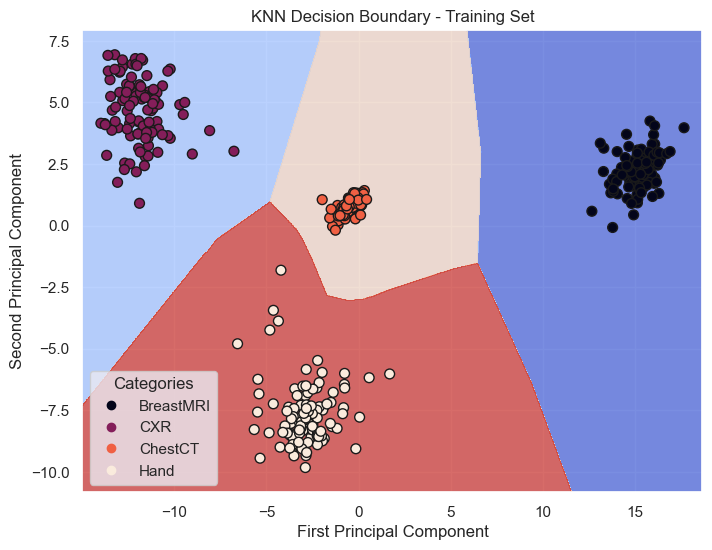

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Δημιουργία του KNN classifier και εκπαίδευση του στο training set
best_knn = grid_search.best_estimator_  # Το βελτιστοποιημένο μοντέλο από το GridSearchCV
best_knn.fit(X_train_lda, y_train)

# Δημιουργία grid για την οπτικοποίηση
h = .02  # Βήμα του grid
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Προβλέψεις για το grid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Χρησιμοποιούμε LabelEncoder για να μετατρέψουμε τις κατηγορίες σε αριθμητικές τιμές
le = LabelEncoder()
Z_numeric = le.fit_transform(Z.ravel())  # Μετατρέπουμε τις προβλέψεις σε αριθμητικές τιμές
y_train_numeric = le.fit_transform(y_train)  # Μετατρέπουμε το y_train σε αριθμητικές τιμές

# Οπτικοποίηση των ορίων απόφασης
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric.reshape(xx.shape), alpha=0.75, cmap=plt.cm.coolwarm)  # Εμφανίζει τα όρια απόφασης

# Εμφανίζει τα δεδομένα του training set με τα χρώματα που αντιστοιχούν στις κατηγορίες
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_numeric, edgecolors='k', marker='o', s=50)

# Προσθήκη του τίτλου και των ετικετών
plt.title("KNN Decision Boundary - Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Δημιουργία legend που να δείχνει τις κατηγορίες
handles, labels = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categories")

# Εμφάνιση του γραφήματος
plt.show()



Classification Report:
              precision    recall  f1-score   support

   BreastMRI       0.94      1.00      0.97        15
         CXR       1.00      0.93      0.97        15
     ChestCT       1.00      1.00      1.00        15
        Hand       0.93      0.93      0.93        15

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:
[[15  0  0  0]
 [ 0 14  0  1]
 [ 0  0 15  0]
 [ 1  0  0 14]]

Accuracy: 0.9666666666666667
ROC-AUC: 0.9775925925925926


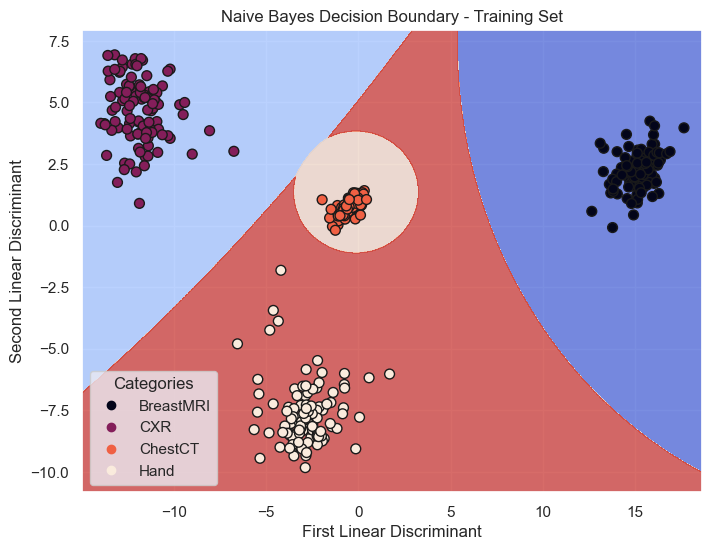

In [188]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Δημιουργία του μοντέλου Naive Bayes
nb = GaussianNB()

# Χρησιμοποιούμε GridSearchCV για να βρούμε τις βέλτιστες υπερπαραμέτρους (αν και το Naive Bayes συνήθως δεν έχει πολλές παραμέτρους για να βελτιστοποιήσουμε)
param_grid = {}  # Δεν υπάρχουν υπερπαράμετροι για να βελτιστοποιήσουμε στο Naive Bayes, αλλά μπορείς να προσθέσεις εδώ αν θέλεις
grid_search = GridSearchCV(nb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)

# Εκτύπωση του καλύτερου μοντέλου (αν και δεν υπάρχουν παραμέτροι για το Naive Bayes)
best_nb = grid_search.best_estimator_

# Προβλέψεις στο Test Set
y_pred = best_nb.predict(X_test_lda)
y_pred_proba = best_nb.predict_proba(X_test_lda)

# Εκτύπωση Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Εκτύπωση Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Εκτύπωση Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Υπολογισμός ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC: {roc_auc}")

# Οπτικοποίηση των ορίων απόφασης για Naive Bayes
h = .02  # Βήμα του grid
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Προβλέψεις για το grid
Z = best_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Χρησιμοποιούμε LabelEncoder για να μετατρέψουμε τις κατηγορίες σε αριθμητικές τιμές
le = LabelEncoder()
Z_numeric = le.fit_transform(Z.ravel())  # Μετατρέπουμε τις προβλέψεις σε αριθμητικές τιμές
y_train_numeric = le.fit_transform(y_train)  # Μετατρέπουμε το y_train σε αριθμητικές τιμές

# Οπτικοποίηση των ορίων απόφασης
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric.reshape(xx.shape), alpha=0.75, cmap=plt.cm.coolwarm)  # Εμφανίζει τα όρια απόφασης

# Εμφανίζει τα δεδομένα του training set με τα χρώματα που αντιστοιχούν στις κατηγορίες
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_numeric, edgecolors='k', marker='o', s=50)

# Προσθήκη του τίτλου και των ετικετών
plt.title("Naive Bayes Decision Boundary - Training Set")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')

# Δημιουργία legend που να δείχνει τις κατηγορίες
handles, labels = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categories")

# Εμφάνιση του γραφήματος
plt.show()


Best var_smoothing: 0.012328467394420659

Classification Report:
              precision    recall  f1-score   support

   BreastMRI       0.94      1.00      0.97        15
         CXR       1.00      0.93      0.97        15
     ChestCT       1.00      1.00      1.00        15
        Hand       0.93      0.93      0.93        15

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:
[[15  0  0  0]
 [ 0 14  0  1]
 [ 0  0 15  0]
 [ 1  0  0 14]]

Accuracy: 0.9666666666666667
ROC-AUC: 0.9814814814814815


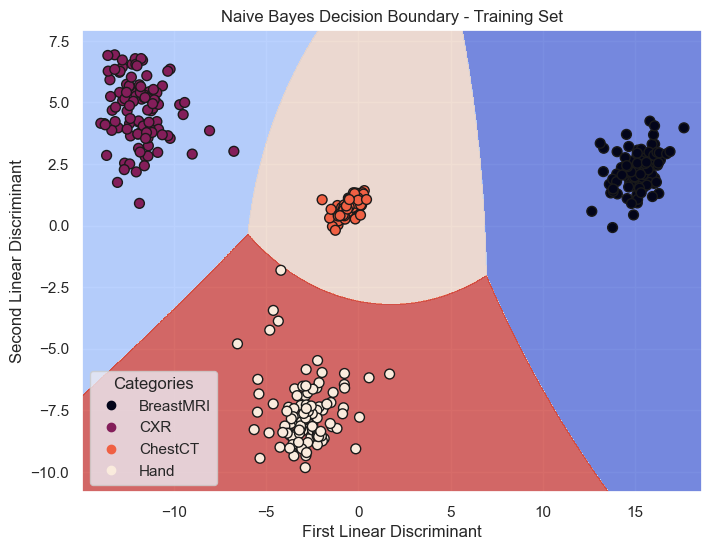

In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Δημιουργία του μοντέλου Naive Bayes
nb = GaussianNB()

# Ορίζουμε το εύρος τιμών για την υπερπαράμετρο var_smoothing
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Λογάριθμική κλίμακα για το smoothing
}

# Χρησιμοποιούμε GridSearchCV για να βρούμε την καλύτερη υπερπαράμετρο
grid_search = GridSearchCV(nb, param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# Εκπαιδεύουμε το μοντέλο με το GridSearchCV
grid_search.fit(X_train_lda, y_train)

# Εμφανίζουμε την καλύτερη υπερπαράμετρο και το αντίστοιχο μοντέλο
best_nb = grid_search.best_estimator_
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")

# Προβλέψεις στο Test Set με το καλύτερο μοντέλο
y_pred = best_nb.predict(X_test_lda)
y_pred_proba = best_nb.predict_proba(X_test_lda)

# Εκτύπωση Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Εκτύπωση Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Εκτύπωση Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Υπολογισμός ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC: {roc_auc}")

# Οπτικοποίηση των ορίων απόφασης για Naive Bayes
h = .02  # Βήμα του grid
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Προβλέψεις για το grid
Z = best_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Χρησιμοποιούμε LabelEncoder για να μετατρέψουμε τις κατηγορίες σε αριθμητικές τιμές
le = LabelEncoder()
Z_numeric = le.fit_transform(Z.ravel())  # Μετατρέπουμε τις προβλέψεις σε αριθμητικές τιμές
y_train_numeric = le.fit_transform(y_train)  # Μετατρέπουμε το y_train σε αριθμητικές τιμές

# Οπτικοποίηση των ορίων απόφασης
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric.reshape(xx.shape), alpha=0.75, cmap=plt.cm.coolwarm)  # Εμφανίζει τα όρια απόφασης

# Εμφανίζει τα δεδομένα του training set με τα χρώματα που αντιστοιχούν στις κατηγορίες
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_numeric, edgecolors='k', marker='o', s=50)

# Προσθήκη του τίτλου και των ετικετών
plt.title("Naive Bayes Decision Boundary - Training Set")
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')

# Δημιουργία legend που να δείχνει τις κατηγορίες
handles, labels = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Categories")

# Εμφάνιση του γραφήματος
plt.show()
